# COMP47490 Assignment 1

**Student Name** `Zhi Zhang` <br/>
**Student Number** `18210054` <br/>
**Dataset** `./pulsar_star_18210054.csv`

## Import all required packages

In [1]:
import pandas as pd
import numpy as np

import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# to make the plots display inline 
%matplotlib inline 

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import RocCurveDisplay
from sklearn.dummy import DummyClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

## Load the csv file

In [2]:
df = pd.read_csv('./pulsar_star_18210054.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,111.562500,42.102136,0.319276,0.574104,1.281773,13.766509,13.805893,218.010331,0.0
1,95.320312,43.896350,NaN,0.355686,27.120401,58.575143,1.921963,2.159064,0.0
2,100.742188,48.711723,0.419604,0.056188,2.396321,15.200888,9.155709,104.463136,0.0
3,103.078125,43.497595,0.490864,0.619546,1.984114,18.544953,9.997285,104.005589,0.0
4,113.250000,43.170266,0.279548,0.560351,1.335284,12.285843,12.636715,197.247397,0.0


## Task 1: 
**Prepare a data quality plan for the dataset. Mark down all the features where there are potential problems or data quality issues. Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data. In particular, pay attention to missing data and carefully address this issue. [15 marks]**

### Check size of dataframe 
Show how many rows and columns this dataframe has.

In [3]:
print("This dataframe have %d rows & %d columns" % (df.shape[0],df.shape[1]))

This dataframe have 10000 rows & 9 columns


### Check column name of dataframe
Sometimes, spaces or other characters may be included to affect subsequent operations.

In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

From the above output we can see that there is a space at the beginning of each column name.<br/>
We use `.strip()` funtion in pandas to solve this issue.

In [5]:
df.rename(columns=lambda x:x.strip(),inplace=True)
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We could also use the `.replace()` method, but it would remove all spaces from the string, making the name hard to read.

In [6]:
df.rename(columns=lambda x:x.replace(' ','')).columns

Index(['Meanoftheintegratedprofile', 'Standarddeviationoftheintegratedprofile',
       'Excesskurtosisoftheintegratedprofile',
       'Skewnessoftheintegratedprofile', 'MeanoftheDM-SNRcurve',
       'StandarddeviationoftheDM-SNRcurve', 'ExcesskurtosisoftheDM-SNRcurve',
       'SkewnessoftheDM-SNRcurve', 'target_class'],
      dtype='object')

### Check data types in each column
Columns may have wrong data type.

In [7]:
df.dtypes

Mean of the integrated profile                  float64
Standard deviation of the integrated profile    float64
Excess kurtosis of the integrated profile       float64
Skewness of the integrated profile              float64
Mean of the DM-SNR curve                        float64
Standard deviation of the DM-SNR curve          float64
Excess kurtosis of the DM-SNR curve             float64
Skewness of the DM-SNR curve                    float64
target_class                                    float64
dtype: object

In [8]:
df.target_class.value_counts()

0.0    9085
1.0     915
Name: target_class, dtype: int64

Although `target_class` is identified as numerical columns, they should rather be categorical. 

In [9]:
df['target_class'] = df['target_class'].astype('category')
df.dtypes

Mean of the integrated profile                   float64
Standard deviation of the integrated profile     float64
Excess kurtosis of the integrated profile        float64
Skewness of the integrated profile               float64
Mean of the DM-SNR curve                         float64
Standard deviation of the DM-SNR curve           float64
Excess kurtosis of the DM-SNR curve              float64
Skewness of the DM-SNR curve                     float64
target_class                                    category
dtype: object

### Check descriptive stats for continuous features
Since most of columns in our df is `float64` therefore we check the stats for these numeric columns.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,10000.0,111.164584,25.625865,5.812500,100.992188,115.363281,127.251953,189.734375
Standard deviation of the integrated profile,10000.0,46.578705,6.805153,24.772042,42.472624,46.990937,50.976002,91.808628
Excess kurtosis of the integrated profile,8588.0,0.473965,1.059690,-1.738021,0.022139,0.221773,0.470794,7.856370
Skewness of the integrated profile,10000.0,1.756248,6.141917,-1.781888,-0.189775,0.196507,0.921242,62.868531
Mean of the DM-SNR curve,10000.0,12.746253,29.722174,0.213211,1.919732,2.792642,5.439172,211.948997
Standard deviation of the DM-SNR curve,9060.0,26.374168,19.646993,7.370432,14.408258,18.384785,28.354695,110.642211
Excess kurtosis of the DM-SNR curve,10000.0,8.303555,4.509483,-2.812353,5.790216,8.445792,10.698657,34.539844
Skewness of the DM-SNR curve,9488.0,104.669149,105.869659,-1.976976,34.784600,82.966878,139.192865,1191.000837


### Check for duplicate row/columns

In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


### Check Missing Values
From `count` we find there are 3 columns are contain missing values. Because the total number is less than 10k. <br/>
We double check it again.


In [12]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1412
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           940
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     512
target_class                                       0
dtype: int64

**Missing Rate**

In [13]:
100 * (df.isnull().sum()/df.shape[0])

Mean of the integrated profile                   0.00
Standard deviation of the integrated profile     0.00
Excess kurtosis of the integrated profile       14.12
Skewness of the integrated profile               0.00
Mean of the DM-SNR curve                         0.00
Standard deviation of the DM-SNR curve           9.40
Excess kurtosis of the DM-SNR curve              0.00
Skewness of the DM-SNR curve                     5.12
target_class                                     0.00
dtype: float64

Indeed, these columns contain missing value <br/>
- Excess kurtosis of the integrated profile
- Standard deviation of the DM-SNR curve
- Skewness of the DM-SNR curve 

### Check the distribution of the target class before split

In [14]:
100 * (df.target_class.value_counts()/df.shape[0])

0.0    90.85
1.0     9.15
Name: target_class, dtype: float64

### Split training set (70%) and test set (30%) **ahead**

To avoid **Data Leakage**, we must split the dataset into train and test sets, with the training data used only for feature selection and model fitting. The test set will be utilised exclusively for evaluation and not for model training.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df,df.target_class,\
                                                    test_size=0.3, random_state=42)
print("Training set size is %d\nTest set size is %d" % (X_train.shape[0], X_test.shape[0]))

Training set size is 7000
Test set size is 3000


### Check the distribution of the target class again after split

In [16]:
100 * (y_train.value_counts()/y_train.shape[0])

0.0    90.957143
1.0     9.042857
Name: target_class, dtype: float64

In [17]:
100 * (y_test.value_counts()/y_test.shape[0])

0.0    90.6
1.0     9.4
Name: target_class, dtype: float64

The ratio change of the two target classes after separation is **less than 0.5%**, which is an acceptable range.

### Find missing values in training set & test set

In [18]:
X_train.isnull().sum()

Mean of the integrated profile                    0
Standard deviation of the integrated profile      0
Excess kurtosis of the integrated profile       988
Skewness of the integrated profile                0
Mean of the DM-SNR curve                          0
Standard deviation of the DM-SNR curve          651
Excess kurtosis of the DM-SNR curve               0
Skewness of the DM-SNR curve                    359
target_class                                      0
dtype: int64

In [19]:
X_test.isnull().sum()

Mean of the integrated profile                    0
Standard deviation of the integrated profile      0
Excess kurtosis of the integrated profile       424
Skewness of the integrated profile                0
Mean of the DM-SNR curve                          0
Standard deviation of the DM-SNR curve          289
Excess kurtosis of the DM-SNR curve               0
Skewness of the DM-SNR curve                    153
target_class                                      0
dtype: int64

First, seperate our df into two part:
1. Integrated profile + target_class
2. DM-SNR curve + target_class

Through understand our data set, it is found that the first 4 columns are all about the mean value, standard deviation, Excess kurtosis and Skewness of the **Integrated profile**, and the last 4 columns are similar about the data of the **DM-SNR curve**. We divide them into two main part and combine them with the *target_class* for ***missing value prediction***.

In [20]:
integrated_profile = [k for k in list(df.columns) if ('integrated profile' in k) or ('target_class' in k)]
DM_SNR = [k for k in list(df.columns) if ('DM-SNR' in k) or ('target_class' in k)]

**Find Best KNN for column `Excess kurtosis of the integrated profile`**
<br/>We test n_neighbors from 1\~10, find the best n_neighbors with highest score.

Use rows with non-null values

In [21]:
X_train_ip_knn = X_train[integrated_profile][~X_train[integrated_profile].isna().any(axis=1)]
X_train_ip_knn.shape

(6012, 5)

Split sub train set and sub test set

In [22]:
X_train_ip_knn_drop = X_train_ip_knn.drop('Excess kurtosis of the integrated profile', axis=1)
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train_ip_knn_drop,\
                                                                    X_train_ip_knn['Excess kurtosis of the integrated profile'],\
                                                                    test_size=0.3, \
                                                                    random_state=42)
print("Training set size is %d\nTest set size is %d" % (X_sub_train.shape[0], X_sub_test.shape[0]))

Training set size is 4208
Test set size is 1804


In [23]:
def best_KNN(X_train, X_test, y_train, y_test):
    result = {}
    neighbors = np.arange(1,10,2)
    for k in neighbors:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        train_preds = knn_model.predict(X_test)
        MSE = mean_squared_error(y_test, train_preds)
        RMSE = math.sqrt(MSE)
        print("n_neighbors: %d, Root Mean Square Error (RMSE):%f" % (k,RMSE))
        result[k] = RMSE
    top = sorted(result.items(), key=lambda x: x[1], reverse=False)[0]
    print("\nThe Best KNN is: \nn_neighbors = %d with RMSE = %f." % (top[0],top[1]))
    return KNeighborsRegressor(n_neighbors=top[0]).fit(X_train, y_train)
    
model_1 = best_KNN(X_sub_train, X_sub_test, y_sub_train, y_sub_test)

n_neighbors: 1, Root Mean Square Error (RMSE):0.206790
n_neighbors: 3, Root Mean Square Error (RMSE):0.173286
n_neighbors: 5, Root Mean Square Error (RMSE):0.169672
n_neighbors: 7, Root Mean Square Error (RMSE):0.168854
n_neighbors: 9, Root Mean Square Error (RMSE):0.169546

The Best KNN is: 
n_neighbors = 7 with RMSE = 0.168854.


From the result we can see that `n_neighbors = 7` is the **best strategy** for this column: `Excess kurtosis of the integrated profile`.

Let's do the same thing for the rest of them.

**Find Best KNN for column `Standard deviation of the DM-SNR curve` and `Skewness of the DM-SNR curve`**

In [24]:
X_train_dc_knn = X_train[DM_SNR][~X_train[DM_SNR].isna().any(axis=1)]
print(X_train_dc_knn.shape[0],"rows,",X_train_dc_knn.shape[1],"columns\n")

col = 'Standard deviation of the DM-SNR curve'
X_train_dc_knn_drop = X_train_dc_knn.drop([col,'Skewness of the DM-SNR curve'], axis=1)
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train_dc_knn_drop,\
                                                                    X_train_dc_knn[col],\
                                                                    test_size=0.3, \
                                                                    random_state=42)
print("Training set size is %d\nTest set size is %d\n" % (X_sub_train.shape[0], X_sub_test.shape[0]))
model_2 = best_KNN(X_sub_train, X_sub_test, y_sub_train, y_sub_test)

6023 rows, 5 columns

Training set size is 4216
Test set size is 1807

n_neighbors: 1, Root Mean Square Error (RMSE):4.966095
n_neighbors: 3, Root Mean Square Error (RMSE):4.264471
n_neighbors: 5, Root Mean Square Error (RMSE):4.188840
n_neighbors: 7, Root Mean Square Error (RMSE):4.198574
n_neighbors: 9, Root Mean Square Error (RMSE):4.142869

The Best KNN is: 
n_neighbors = 9 with RMSE = 4.142869.


For column `Standard deviation of the DM-SNR curve`, the **best strategy** is `n_neighbors = 9`.

In [25]:
col = 'Skewness of the DM-SNR curve'
X_train_dc_knn_drop = X_train_dc_knn.drop([col,'Standard deviation of the DM-SNR curve'], axis=1)
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train_dc_knn_drop,\
                                                                    X_train_dc_knn[col],\
                                                                    test_size=0.3, \
                                                                    random_state=42)
print("Training set size is %d\nTest set size is %d\n" % (X_sub_train.shape[0], X_sub_test.shape[0]))
model_3 = best_KNN(X_sub_train, X_sub_test, y_sub_train, y_sub_test)

Training set size is 4216
Test set size is 1807

n_neighbors: 1, Root Mean Square Error (RMSE):13.474229
n_neighbors: 3, Root Mean Square Error (RMSE):11.271262
n_neighbors: 5, Root Mean Square Error (RMSE):11.351936
n_neighbors: 7, Root Mean Square Error (RMSE):12.074839
n_neighbors: 9, Root Mean Square Error (RMSE):12.656006

The Best KNN is: 
n_neighbors = 3 with RMSE = 11.271262.


Simility, for column `Skewness of the DM-SNR curve`, the **best strategy** is `n_neighbors = 3`.

### Check for outliers (X_train)

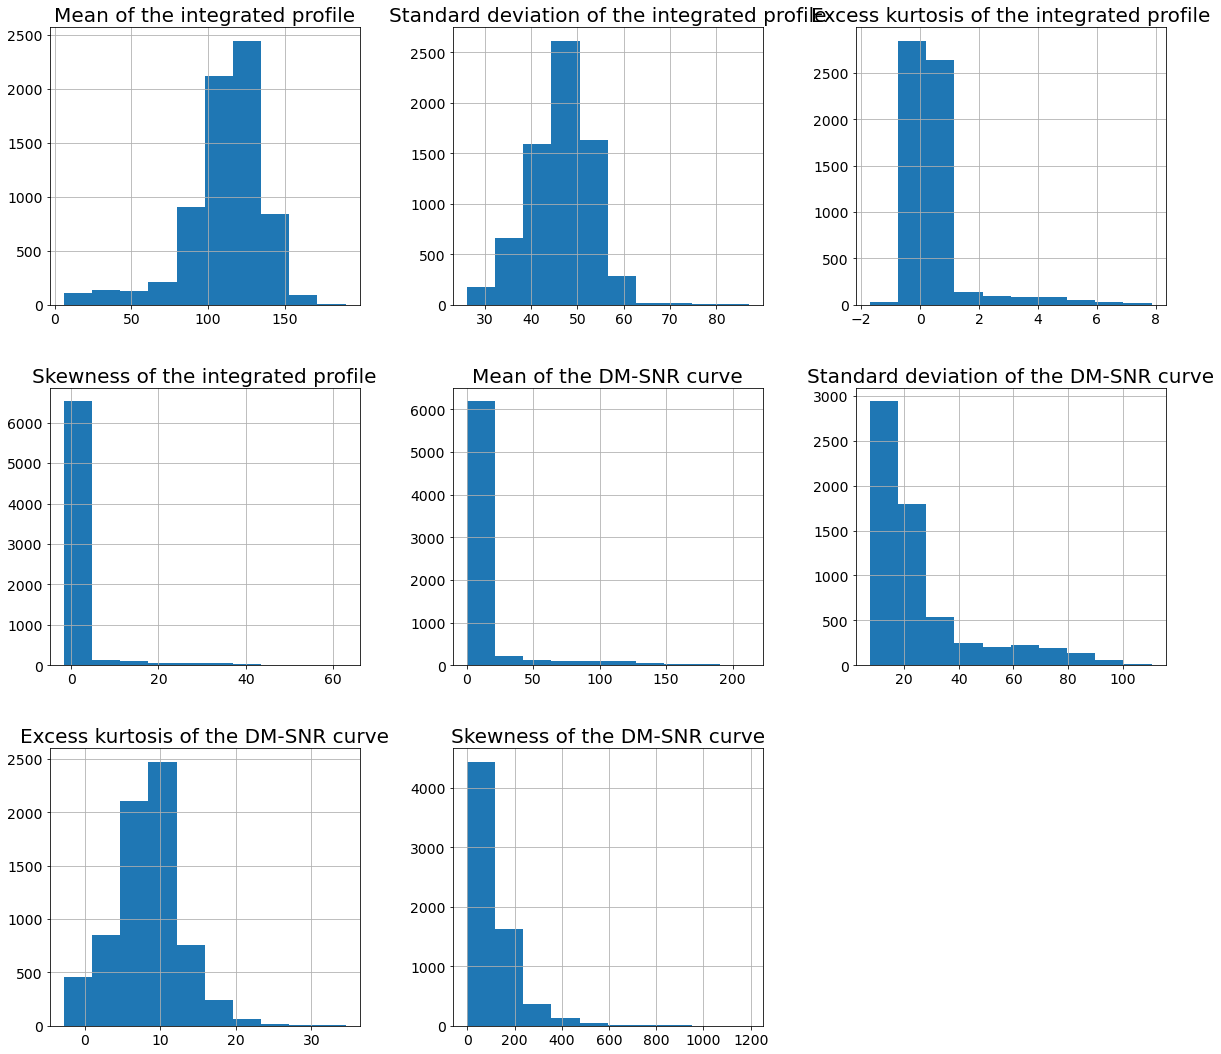

In [26]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
X_train.hist(figsize=(20, 25), layout=(4,3));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

### Check for outliers (X_test)

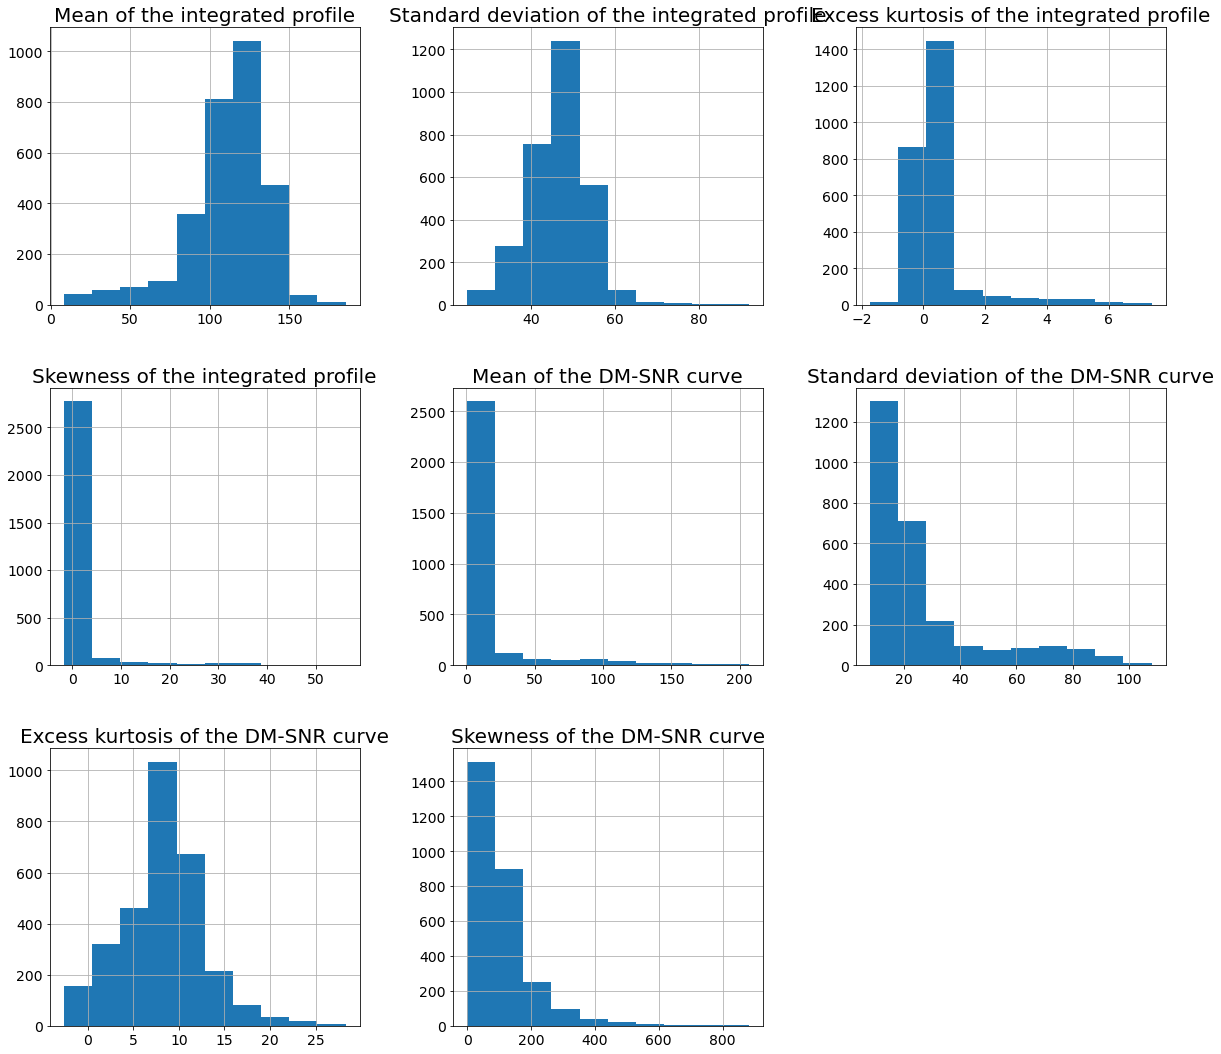

In [27]:
X_test.hist(figsize=(20, 25), layout=(4,3));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

It obvious we can see potential invalid data from the histograms above, for example,  negative numbers (Excess kurtosis of the DM-SNR curve < 0). But, because it's a kurtosis value, it can be negative. In addition, we can also find some potential outliers in our data, like `Mean of the DM-SNR curve`. Another way to see outliers and potential errors is to look at boxplots for each feature.

- Training set

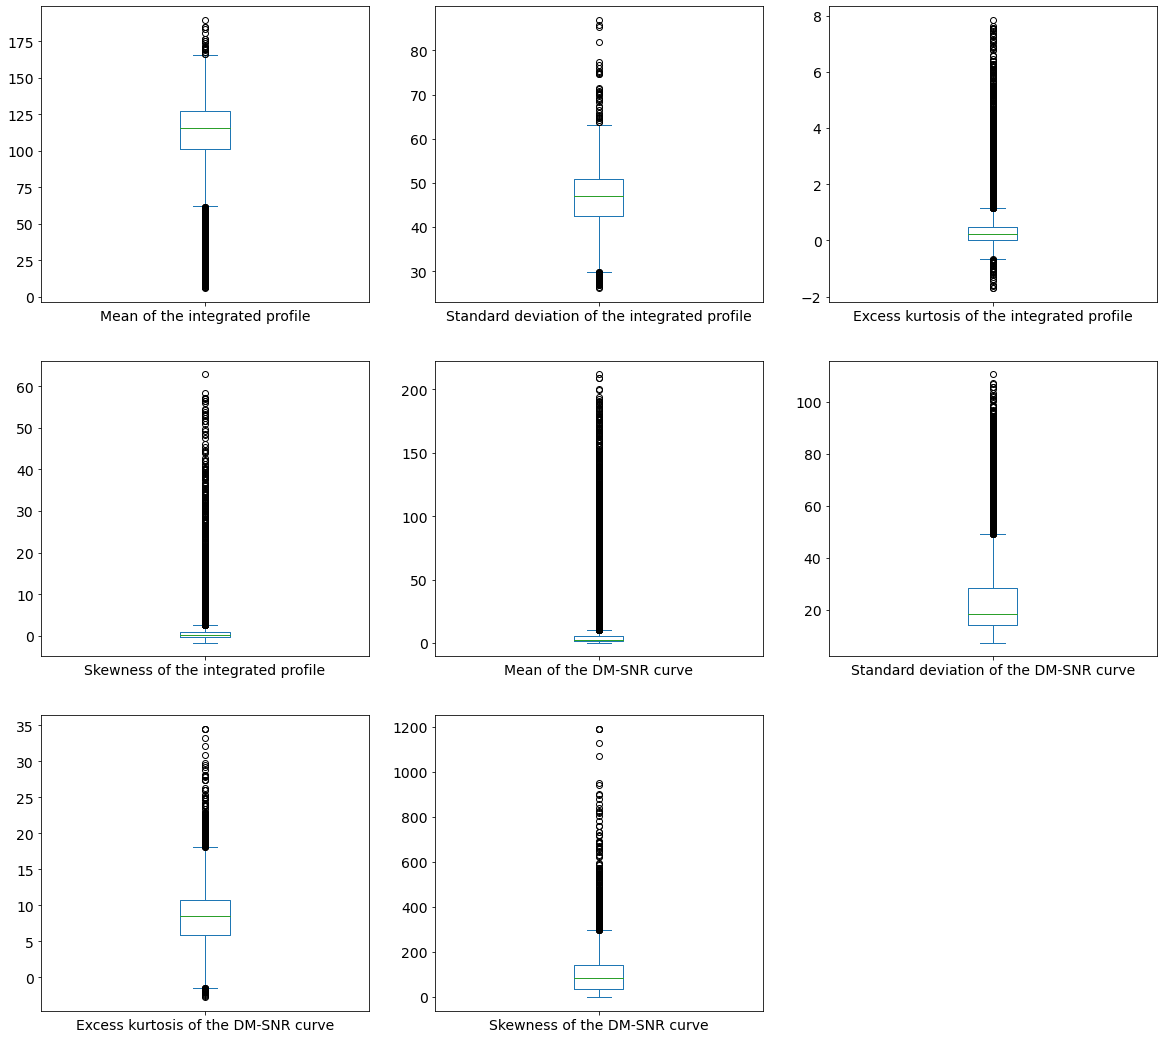

In [28]:
numeric_columns = X_train.select_dtypes(['float64']).columns
X_train[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25),\
                              layout=(4, 3), sharex=False, sharey=False);

- Test set

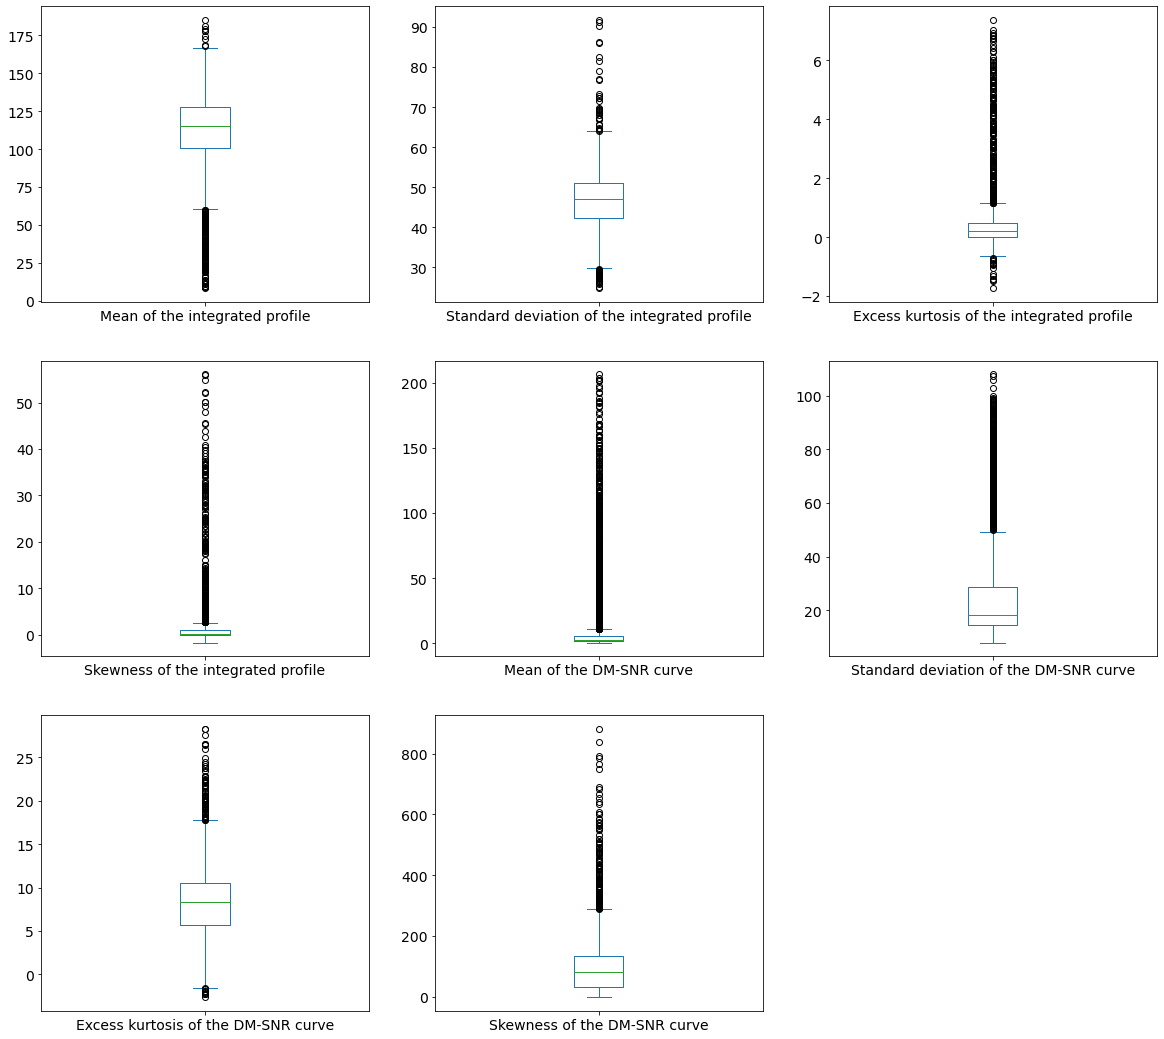

In [29]:
numeric_columns = X_test.select_dtypes(['float64']).columns
X_test[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25),\
                              layout=(4, 3), sharex=False, sharey=False);

- Category column in **training set**

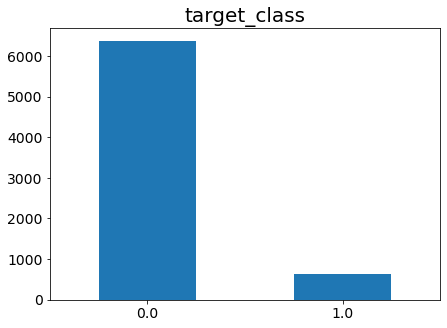

In [30]:
categorical_columns = X_train.select_dtypes(['category']).columns
for column in categorical_columns:
    X_train[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(7,5), rot=0)
    plt.show()

- Category column in **test set**

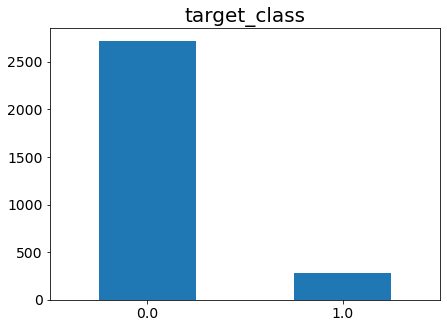

In [31]:
categorical_columns = X_test.select_dtypes(['category']).columns
for column in categorical_columns:
    X_test[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(7,5), rot=0)
    plt.show()

As we can see from the box plot, there are a large number of outliers in each column, so let's figure out what they are.

In [32]:
# Use non-null here, because Nan value will affect process quantile. 
X_train_drop = X_train[~X_train.isna().any(axis=1)]
for col in X_train_drop[numeric_columns].columns:
    print("\n--------------------------------------\nColumn: %s" % col)
    Q3 = np.quantile(X_train_drop[col], 0.75)
    Q1 = np.quantile(X_train_drop[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print("Higher than upper range:\n",X_train_drop[X_train_drop[col]>upper_range].target_class.value_counts())
    print("Lower than lower range:\n",X_train_drop[X_train_drop[col]<lower_range].target_class.value_counts())


--------------------------------------
Column: Mean of the integrated profile
Higher than upper range:
 0.0    16
1.0     0
Name: target_class, dtype: int64
Lower than lower range:
 1.0    270
0.0      7
Name: target_class, dtype: int64

--------------------------------------
Column: Standard deviation of the integrated profile
Higher than upper range:
 0.0    25
1.0     2
Name: target_class, dtype: int64
Lower than lower range:
 1.0    47
0.0     0
Name: target_class, dtype: int64

--------------------------------------
Column: Excess kurtosis of the integrated profile
Higher than upper range:
 1.0    387
0.0     31
Name: target_class, dtype: int64
Lower than lower range:
 0.0    33
1.0     0
Name: target_class, dtype: int64

--------------------------------------
Column: Skewness of the integrated profile
Higher than upper range:
 1.0    371
0.0    177
Name: target_class, dtype: int64
Lower than lower range:
 0.0    0
1.0    0
Name: target_class, dtype: int64

----------------------

It seems that most of these outliers are belong to a certain target class, so we cannot directly remove them, because it will lead to the accuracy and diversity of our later model. My strategy is to clamp high outliers to 95th percentile if the number of outliers in each categories are not much different. Conversely, leave it as it is.

### Summary of the issues in data and potential handling strategies

| Feature                 | Data Quality Issue   | Handling Strategy      
|-------------------------|----------------------|------------------------
|Mean of the integrated profile (float64)             | High Outliers | Most higher values are class 0, <br/> Most lower values are class 1, <br/> Therefore, keep as is 
Standard deviation of the integrated profile (float64)| High Outliers | Most higher values are class 0, <br/> Most lower values are class 1, <br/> Therefore, keep as is 
Excess kurtosis of the integrated profile (float64)   | Missing Values (14.12% training + test) <br/>& High Outliers | Use KNN (n_neighbors=7) predict & fill up <br/> Most higher values are class 1, <br/> Most lower values are class 0, <br/> Therefore, keep as is 
Skewness of the integrated profile (float64)          | High Outliers | Most higher values are class 1, <br/> Therefore, keep as is 
Mean of the DM-SNR curve (float64)                    | High Outliers | Higher value types are almost well-distributed, <br/> Clamp high outliers to the 95th percentile 
Standard deviation of the DM-SNR curve (float64)      | Missing Values (9.4% training + test) <br/>& High Outliers | Use KNN (n_neighbors=9) predict and fill up <br/> Higher value types are almost well-distributed, <br/> Clamp high outliers to the 95th percentile 
Excess kurtosis of the DM-SNR curve (float64)         | High Outliers | Most higher and lower values are both class 0, <br/> Therefore, keep as is 
Skewness of the DM-SNR curve (float64)                | Missing Values (5.12% training + test) <br/>& High Outliers  | Use KNN (n_neighbors=3) predict and fill up <br/> Most higher values are class 0, <br/> Therefore, keep as is 
target_class (category)                               | Need to normalize | Use LabelEncoder to normalize labels 

### Clean the data using the strategies

Store a copy of the training and test data before filling in the missing values.

In [33]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

**Handel Missing Value**
<br/>Predict & fill "Integrated profile" part

- Training set

In [34]:
# Find rows with Nan values in `Excess kurtosis of the integrated profile` and drop this column it self.
col = "Excess kurtosis of the integrated profile"

# Find the train part
X_train_in = X_train[integrated_profile][X_train[col].isna()].drop(col, axis=1)

# Predict missing value
X_train_preds = model_1.predict(X_train_in)

# Assign back to big df
miss = X_train[X_train[col].isna()].copy()
miss[col] = X_train_preds
X_train = pd.concat([X_train[~X_train[col].isna()], miss])
print("This training set have %d rows & %d columns" % (X_train.shape[0],X_train.shape[1]))
X_train.head()

This training set have 7000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
9069,77.898438,38.748758,0.779152,2.561157,3.944816,24.908366,6.990857,51.378944,0.0
2603,140.046875,57.960501,-0.202542,-0.439522,2.341137,15.870052,9.176281,101.322406,0.0
7738,104.070312,39.286047,0.515515,0.890505,3.392977,20.992858,7.445504,60.843403,0.0
1579,102.789062,52.293740,0.418448,-0.076064,9.283445,35.877450,4.074899,16.398393,0.0
3548,105.656250,44.743791,0.299245,0.711990,6.410535,NaN,5.500640,30.915947,0.0


- Test set

In [35]:
# Find the train part
X_test_in = X_test[integrated_profile][X_test[col].isna()].drop(col, axis=1)

# Predict missing value
X_test_preds = model_1.predict(X_test_in)

# Assign back to big df
miss = X_test[X_test[col].isna()].copy()
miss[col] = X_test_preds
X_test = pd.concat([X_test[~X_test[col].isna()], miss])
print("This test set have %d rows & %d columns" % (X_test.shape[0],X_test.shape[1]))
X_test.head()

This test set have 3000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6252,119.234375,51.639145,0.161919,-0.193289,4.618729,23.265340,6.035227,40.485421,0.0
4684,120.078125,59.005509,0.060817,-0.609987,2.596154,16.078506,8.361231,86.391076,0.0
4742,116.671875,47.630595,0.229766,-0.132305,3.112876,19.846901,7.953282,72.263468,0.0
4521,114.835938,51.057685,0.184721,-0.033283,0.500000,9.599549,22.831765,550.553775,0.0
6340,47.757812,32.278027,3.746990,18.275764,29.483278,54.056971,2.305995,5.082159,1.0


<br/>Predict & fill "Standard deviation of the DM-SNR curve" part
- Training set

In [36]:
col = 'Standard deviation of the DM-SNR curve'

# Find the train part
X_train_in = X_train[DM_SNR][X_train[col].isna()].drop([col,'Skewness of the DM-SNR curve'], axis=1)

# Predict missing value
X_train_preds = model_2.predict(X_train_in)

# Assign back to big df
miss = X_train[X_train[col].isna()].copy()
miss[col] = X_train_preds
X_train = pd.concat([X_train[~X_train[col].isna()], miss])
print("This training set have %d rows & %d columns" % (X_train.shape[0],X_train.shape[1]))
X_train.head()

This training set have 7000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
9069,77.898438,38.748758,0.779152,2.561157,3.944816,24.908366,6.990857,51.378944,0.0
2603,140.046875,57.960501,-0.202542,-0.439522,2.341137,15.870052,9.176281,101.322406,0.0
7738,104.070312,39.286047,0.515515,0.890505,3.392977,20.992858,7.445504,60.843403,0.0
1579,102.789062,52.293740,0.418448,-0.076064,9.283445,35.877450,4.074899,16.398393,0.0
409,129.132812,49.604273,-0.059831,-0.220326,1.198161,13.143854,13.470414,201.638242,0.0


- Test set

In [37]:
# Find the train part
X_test_in = X_test[DM_SNR][X_test[col].isna()].drop([col,'Skewness of the DM-SNR curve'], axis=1)

# Predict missing value
X_test_preds = model_2.predict(X_test_in)

# Assign back to big df
miss = X_test[X_test[col].isna()].copy()
miss[col] = X_test_preds
X_test = pd.concat([X_test[~X_test[col].isna()], miss])
print("This test set have %d rows & %d columns" % (X_test.shape[0],X_test.shape[1]))
X_test.head()

This test set have 3000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6252,119.234375,51.639145,0.161919,-0.193289,4.618729,23.265340,6.035227,40.485421,0.0
4684,120.078125,59.005509,0.060817,-0.609987,2.596154,16.078506,8.361231,86.391076,0.0
4742,116.671875,47.630595,0.229766,-0.132305,3.112876,19.846901,7.953282,72.263468,0.0
4521,114.835938,51.057685,0.184721,-0.033283,0.500000,9.599549,22.831765,550.553775,0.0
6340,47.757812,32.278027,3.746990,18.275764,29.483278,54.056971,2.305995,5.082159,1.0


<br/>Predict & fill "Skewness of the DM-SNR curve" part
- Training set

In [38]:
col = 'Skewness of the DM-SNR curve'

# Find the train part
X_train_in = X_train[DM_SNR][X_train[col].isna()].drop([col,'Standard deviation of the DM-SNR curve'], axis=1)

# Predict missing value
X_train_preds = model_3.predict(X_train_in)

# Assign back to big df
miss = X_train[X_train[col].isna()].copy()
miss[col] = X_train_preds
X_train = pd.concat([X_train[~X_train[col].isna()], miss])
print("This training set have %d rows & %d columns" % (X_train.shape[0],X_train.shape[1]))
X_train.head()

This training set have 7000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
9069,77.898438,38.748758,0.779152,2.561157,3.944816,24.908366,6.990857,51.378944,0.0
2603,140.046875,57.960501,-0.202542,-0.439522,2.341137,15.870052,9.176281,101.322406,0.0
7738,104.070312,39.286047,0.515515,0.890505,3.392977,20.992858,7.445504,60.843403,0.0
1579,102.789062,52.293740,0.418448,-0.076064,9.283445,35.877450,4.074899,16.398393,0.0
409,129.132812,49.604273,-0.059831,-0.220326,1.198161,13.143854,13.470414,201.638242,0.0


- Test set

In [39]:
# Find the train part
X_test_in = X_test[DM_SNR][X_test[col].isna()].drop([col,'Standard deviation of the DM-SNR curve'], axis=1)

# Predict missing value
X_test_preds = model_3.predict(X_test_in)

# Assign back to big df
miss = X_test[X_test[col].isna()].copy()
miss[col] = X_test_preds
X_test = pd.concat([X_test[~X_test[col].isna()], miss])
print("This test set have %d rows & %d columns" % (X_test.shape[0],X_test.shape[1]))
X_test.head()

This test set have 3000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6252,119.234375,51.639145,0.161919,-0.193289,4.618729,23.265340,6.035227,40.485421,0.0
4684,120.078125,59.005509,0.060817,-0.609987,2.596154,16.078506,8.361231,86.391076,0.0
4742,116.671875,47.630595,0.229766,-0.132305,3.112876,19.846901,7.953282,72.263468,0.0
4521,114.835938,51.057685,0.184721,-0.033283,0.500000,9.599549,22.831765,550.553775,0.0
6340,47.757812,32.278027,3.746990,18.275764,29.483278,54.056971,2.305995,5.082159,1.0


**Check missing ratio again**

In [40]:
100 * (X_train.isnull().sum()/X_train.shape[0])

Mean of the integrated profile                  0.0
Standard deviation of the integrated profile    0.0
Excess kurtosis of the integrated profile       0.0
Skewness of the integrated profile              0.0
Mean of the DM-SNR curve                        0.0
Standard deviation of the DM-SNR curve          0.0
Excess kurtosis of the DM-SNR curve             0.0
Skewness of the DM-SNR curve                    0.0
target_class                                    0.0
dtype: float64

In [41]:
100 * (X_test.isnull().sum()/X_test.shape[0])

Mean of the integrated profile                  0.0
Standard deviation of the integrated profile    0.0
Excess kurtosis of the integrated profile       0.0
Skewness of the integrated profile              0.0
Mean of the DM-SNR curve                        0.0
Standard deviation of the DM-SNR curve          0.0
Excess kurtosis of the DM-SNR curve             0.0
Skewness of the DM-SNR curve                    0.0
target_class                                    0.0
dtype: float64

We can see all clear.

**Clamp specific columns to the 95 percentile**

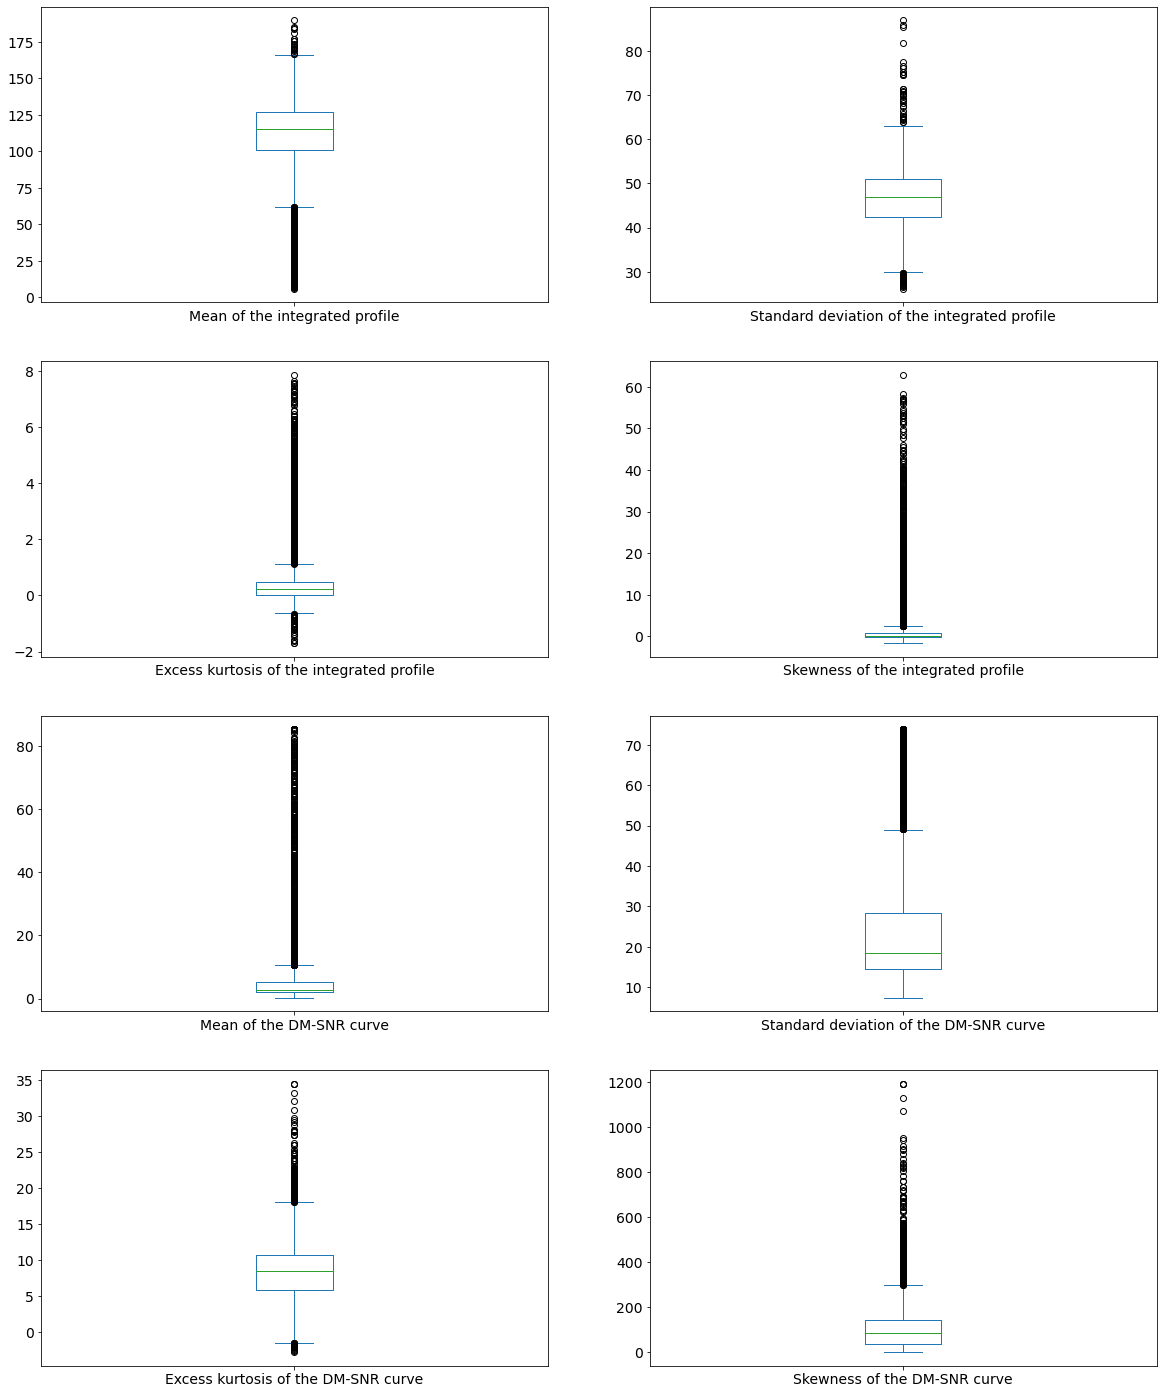

In [42]:
def clamp_95(df,col):
    perc_high = np.percentile(df[col], 95)
    # Clamp high outiers to 95%.
    high_outiers_index = df[col] > perc_high
    # Change all values above perc_high to the value of perc_high
    df.loc[high_outiers_index, col] = perc_high
    return df

for col in ['Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve']:
    clamp_95(X_train,col)
    
for col in ['Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve']:
    clamp_95(X_test,col)
    
X_train[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25),\
                              layout=(4, 2), sharex=False, sharey=False);

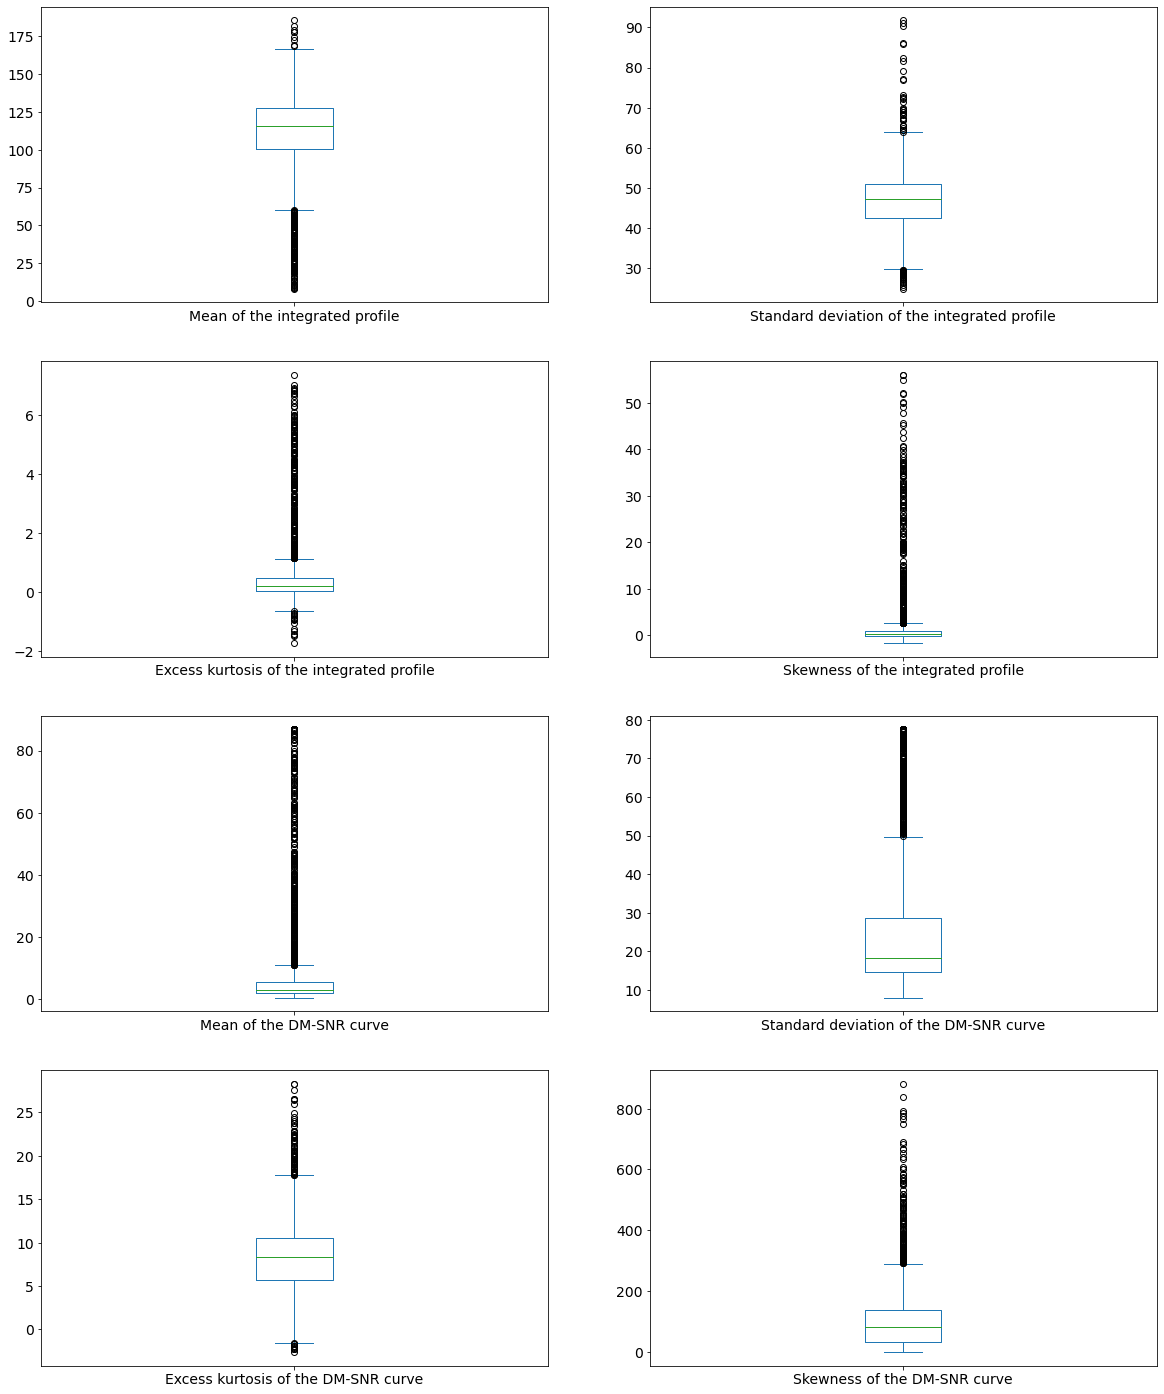

In [43]:
X_test[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25),\
                              layout=(4, 2), sharex=False, sharey=False);

## Task 2: 
**Normalise or Standardise your features as necessary. Carefully decide the normalisation or standardisation technique used. [5 marks]**

**Normalize `target_class`**

We use **LabelEncoder** here because it can store values using less disk space and we don't need to do PCA work latter (where OneHotEncoder is better), so LabelEncoder was selected.

In [44]:
label = LabelEncoder()
X_train['target_class'] = X_train[['target_class']].apply(label.fit_transform)
X_train['target_class'] = X_train['target_class'].astype('category')
X_train.target_class.value_counts

<bound method IndexOpsMixin.value_counts of 9069    0
2603    0
7738    0
1579    0
409     0
       ..
9759    0
1016    0
7338    1
6246    0
2033    1
Name: target_class, Length: 7000, dtype: category
Categories (2, int64): [0, 1]>

In [45]:
X_test['target_class'] = X_test[['target_class']].apply(label.fit_transform)
X_test['target_class'] = X_test['target_class'].astype('category')
X_test.target_class.value_counts

<bound method IndexOpsMixin.value_counts of 6252    0
4684    0
4742    0
4521    0
6340    1
       ..
1807    0
4224    0
1947    0
5364    0
2664    0
Name: target_class, Length: 3000, dtype: category
Categories (2, int64): [0, 1]>

### Show cleaned data

In [46]:
print("This training set have %d rows & %d columns" % (X_train.shape[0],X_train.shape[1]))
X_train.head()

This training set have 7000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
9069,77.898438,38.748758,0.779152,2.561157,3.944816,24.908366,6.990857,51.378944,0
2603,140.046875,57.960501,-0.202542,-0.439522,2.341137,15.870052,9.176281,101.322406,0
7738,104.070312,39.286047,0.515515,0.890505,3.392977,20.992858,7.445504,60.843403,0
1579,102.789062,52.293740,0.418448,-0.076064,9.283445,35.877450,4.074899,16.398393,0
409,129.132812,49.604273,-0.059831,-0.220326,1.198161,13.143854,13.470414,201.638242,0


In [47]:
print("This test set have %d rows & %d columns" % (X_test.shape[0],X_test.shape[1]))
X_test.head()

This test set have 3000 rows & 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6252,119.234375,51.639145,0.161919,-0.193289,4.618729,23.265340,6.035227,40.485421,0
4684,120.078125,59.005509,0.060817,-0.609987,2.596154,16.078506,8.361231,86.391076,0
4742,116.671875,47.630595,0.229766,-0.132305,3.112876,19.846901,7.953282,72.263468,0
4521,114.835938,51.057685,0.184721,-0.033283,0.500000,9.599549,22.831765,550.553775,0
6340,47.757812,32.278027,3.746990,18.275764,29.483278,54.056971,2.305995,5.082159,1


In [48]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,111.196974,46.527718,0.473560,1.757887,10.438430,25.591374,8.347882,105.890106
std,25.657667,6.690087,1.058837,6.156636,20.844182,17.668958,4.507081,107.307782
min,5.812500,26.122681,-1.707789,-1.676724,0.213211,7.370432,-2.812353,-1.976976
25%,101.076172,42.480096,0.026480,-0.188137,1.910535,14.403370,5.833856,35.769695
50%,115.363281,46.956910,0.223355,0.202892,2.784699,18.367495,8.486660,83.794958
75%,127.148438,50.925650,0.465457,0.916203,5.375836,28.250889,10.743125,140.927426
max,189.734375,86.951396,7.856370,62.868531,85.222910,73.833737,34.539844,1191.000837


Due to the wide range of data between these columns, I decided to use **MinMaxScaler** to normalise them.

In [49]:
scaler =  MinMaxScaler(feature_range=(0, 1))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns].values),columns=numeric_columns)
X_train = pd.concat([X_train_scaled, X_train.target_class.reset_index()], axis=1).set_index('index')
X_train.index.name = None

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_columns].values),columns=numeric_columns)
X_test = pd.concat([X_test_scaled, X_test.target_class.reset_index()], axis=1).set_index('index')
X_test.index.name = None

X_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
9069,0.391938,0.207568,0.260027,0.065658,0.043896,0.263874,0.262453,0.044725,0
2603,0.729845,0.523401,0.157384,0.019168,0.025032,0.127884,0.320962,0.086590,0
7738,0.534237,0.216401,0.232462,0.039774,0.037405,0.204962,0.274625,0.052658,0
1579,0.527270,0.430242,0.222313,0.024799,0.106696,0.428914,0.184387,0.015403,0
409,0.670504,0.386028,0.172306,0.022564,0.011586,0.086866,0.435925,0.170678,0
...,...,...,...,...,...,...,...,...,...
9759,0.561337,0.259472,0.239014,0.049326,0.049316,0.241411,0.245138,0.040459,0
1016,0.673052,0.337855,0.178852,0.030176,0.014724,0.107625,0.393358,0.135273,0
7338,0.270155,0.116200,0.477768,0.228800,0.353068,0.837560,0.134223,0.004925,1
6246,0.611418,0.343268,0.194666,0.023071,0.019278,0.114372,0.362314,0.120838,0


In [50]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.572985,0.335451,0.228075,0.053212,0.120283,0.274150,0.298784,0.090418
std,0.139503,0.109982,0.110709,0.095385,0.245198,0.265845,0.120664,0.089950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.517957,0.268909,0.181330,0.023063,0.019966,0.105817,0.231478,0.031641
50%,0.595638,0.342506,0.201915,0.029121,0.030249,0.165461,0.302499,0.071897
75%,0.659715,0.407751,0.227228,0.040172,0.060730,0.314165,0.362910,0.119788
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Task 3: 
**Carefully decide the evaluation measure that is best suited to this application and the dataset. Justify your choice -- What characteristics of the application and the dataset made you decide the evaluation measure you chose. [5 marks]**

In [51]:
X_train.target_class.value_counts()

0    6367
1     633
Name: target_class, dtype: int64

Update `y_train` and `y_test` with cleaned data

In [52]:
y_train = X_train.target_class
y_test = X_test.target_class

Plot a confusion matrix to help me choose evaluation measure

Accuracy: 0.975
Accuracy of the dummy classifier: 0.906
Precision score: 0.916
Recall score: 0.809
F1 score: 0.859
Balanced accuracy: 0.900
--------------------------
SVC(random_state=1)
Average F1: 0.816 +/- 0.028


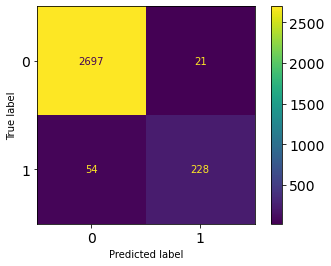

In [53]:
classifier = SVC(random_state=1)
classifier.fit(X_train[numeric_columns], np.ravel(y_train))
y_predicted = classifier.predict(X_test[numeric_columns])
ConfusionMatrixDisplay.from_estimator(classifier, X_test[numeric_columns], y_test);

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, pos_label=1)
recall = recall_score(y_test, y_predicted, pos_label=1)

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train[numeric_columns], y_train)
balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.3f}")
print(f"Accuracy of the dummy classifier: " f"{dummy_classifier.score(X_test, y_test):.3f}")
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")
print(f"F1 score: {f1_score(y_test, y_predicted):.3f}")
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

cv_strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
ts = cross_val_score(classifier, X_test[numeric_columns], y_test, cv=cv_strat, n_jobs=-1, scoring="f1")
print(f"--------------------------\n{classifier}\nAverage F1: {ts.mean():.3f} +/- {ts.std():.3f}")

The accuracy is 97.5% which looked great, and precision and recall are also good. But it shows that the vast majority of the target classes are `0` (there are 2697) and only 228 records are classified as `1`. Therefore, this is an **imbalanced data**. Even through the accuracy can still be a useful metric when the class distribution is slightly skewed. However, when there is a significant skew in the class distributions, accuracy might become an unreliable metric of model performance. **F1-Score** is the harmonic mean of precision and recall values for a classification problem, and it is suitable for usage in this highly unbalanced target class of dataset.

We acquire an accuracy score of 90.6% using the dummy classifier, which always predicts the positive class of simulation success. As a result, without learning anything from the data, this classifier is capable of predicting nearly as correctly as our Decision Tree classifier model. As a result, we can substitute the F1 score (based on precision and recall) for accuracy. We also use **10-fold cross-validation**, with 9 "folds" utilised for training and 1 for testing in each of 10 experiments. This is better to a naive hold-out method because it improves a model's generalisation capabilities by minimising the likelihood of overfitting. We can use this method for classifier comparison.

## Task 4: 
**Compare a decision tree classifier, a kNN classifier and four SVM classifiers (one each with "linear", "poly", "rbf" and "sigmoid" kernel) based on the evaluation measure selected in Task 3. Carefully decide the evaluation methodology for this comparison (e.g., cross validation or a single train/validation/test split or other alternatives). Explore the effect of different parameter settings on these classifiers and find the winner classifier/ parameter setting. Why do you think you got those comparison results? In particular, are you surprised at the relative performance of "linear", "rbf" and "sigmoid" kernels? [25 marks]**

### 1) Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. 

In [54]:
def decision_trees(X_train, X_test, y_train, y_test, detail=True, measure='F1'):
    result = {}
    for depth in [None, 2, 5, 7]:
        if detail == True:
            print("\n****** Max depth = ",depth," ******")
        for samples_in_leaf in [1, 2, 3, 5, 10]:
            if detail == True:
                print('\nMin samples leaf = ', samples_in_leaf)
            dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf, random_state=1) 
            # Fit the decision trees model on the training data.
            dtc.fit(X_train, y_train)

            # Predict on the training dataset.
            y_predicted = dtc.predict(X_train)
            if detail == True:
                print('Prediction performance on training set: ', f1_score(y_train, y_predicted))

            # Predict on the test data.
            y_predicted = dtc.predict(X_test)
            if measure == 'balance':
                score = balanced_accuracy_score(y_test, y_predicted)
            else:
                score = f1_score(y_test, y_predicted)
            result[(depth,samples_in_leaf)] = score
            if detail == True:
                print('Prediction performance on testing set: ', score)

    #accuracy_rank = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
    top = sorted(result.items(), key=lambda x: x[1], reverse=True)[0]
    print("\n--------------------------------------------------------------")
    if measure == 'balance':
        print("The Best Decision Trees Classifier is: \nMax depth = ",top[0][0],"\nMin samples leaf = %d \nwith Balanced accuracy = %f." % (top[0][1],top[1]))
    else:
        print("The Best Decision Trees Classifier is: \nMax depth = ",top[0][0],"\nMin samples leaf = %d \nwith F1 score = %f." % (top[0][1],top[1]))
    # Return best model (fitted)
    return DecisionTreeClassifier(max_depth=top[0][0], min_samples_leaf=top[0][1], random_state=1).fit(X_train, y_train)

dtc = decision_trees(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=True)


****** Max depth =  None  ******

Min samples leaf =  1
Prediction performance on training set:  1.0
Prediction performance on testing set:  0.7536704730831973

Min samples leaf =  2
Prediction performance on training set:  0.9576547231270358
Prediction performance on testing set:  0.7943760984182778

Min samples leaf =  3
Prediction performance on training set:  0.9397394136807818
Prediction performance on testing set:  0.7979274611398963

Min samples leaf =  5
Prediction performance on training set:  0.9234567901234567
Prediction performance on testing set:  0.8287671232876712

Min samples leaf =  10
Prediction performance on training set:  0.9099917423616845
Prediction performance on testing set:  0.8304498269896194

****** Max depth =  2  ******

Min samples leaf =  1
Prediction performance on training set:  0.8827470686767169
Prediction performance on testing set:  0.835978835978836

Min samples leaf =  2
Prediction performance on training set:  0.8827470686767169
Prediction perf

### 2) *k* Nearest Neighbour
Neighbors-based classification is a type of instance-based learning or non-generalizing learning. The default similarity metric for k-NN is Euclidean distance.

In [55]:
def k_nn(X_train, X_test, y_train, y_test, detail=True, measure = 'F1'):
    result = {}
    for n in [2, 5, 10, 12, 15]:
        if detail == True:
            print('\nn_neighbors = ', n)
        knn = KNeighborsClassifier(n_neighbors=n) 
        # Fit the KNN model on the credit risk training data
        knn.fit(X_train, y_train)

        # Predict on the training dataset
        y_predicted = knn.predict(X_train)
        if detail == True:
            print('Prediction performance on training set: ', f1_score(y_train, y_predicted))

        # Predict on the test data using the trained KNN mode
        y_predicted = knn.predict(X_test)
        
        if measure == 'balance':
            score = balanced_accuracy_score(y_test, y_predicted)
        else:
            score = f1_score(y_test, y_predicted)
        result[n] = score
        if detail == True:
            print('Prediction performance on testing set: ', score)

    #accuracy_rank = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
    top = sorted(result.items(), key=lambda x: x[1], reverse=True)[0]
    print("\n--------------------------------------------------------------")
    if  measure == 'balance':
        print("The Best KNN Classifier is: n_neighbors=%d with Balanced accuracy = %f." % (top[0],top[1]))
    else:
        print("The Best KNN Classifier is: n_neighbors=%d with F1 score = %f." % (top[0],top[1]))
    # Return best model (fitted)
    return KNeighborsClassifier(n_neighbors=top[0]).fit(X_train, y_train)
    
knn = k_nn(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=True)


n_neighbors =  2
Prediction performance on training set:  0.9010416666666666
Prediction performance on testing set:  0.8217054263565892

n_neighbors =  5
Prediction performance on training set:  0.8979933110367894
Prediction performance on testing set:  0.8450184501845018

n_neighbors =  10
Prediction performance on training set:  0.8832054560954816
Prediction performance on testing set:  0.8448598130841123

n_neighbors =  12
Prediction performance on training set:  0.8767123287671232
Prediction performance on testing set:  0.8452830188679246

n_neighbors =  15
Prediction performance on training set:  0.8707482993197279
Prediction performance on testing set:  0.853932584269663

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=15 with F1 score = 0.853933.


### 3) SVM classifiers
SVMs are a set of supervised learning methods used for classification, regression and outliers detection.

In [56]:
def SVM(X_train, X_test, y_train, y_test, detail=True, measure = 'F1'):
    result = {}
    for kernel in ["rbf", "linear", "sigmoid", "poly"]:
        if detail == True:
            print('\nSVC(kernel=%s)' % kernel)
        svm = SVC(kernel=kernel, degree=2, random_state=1)
        svm.fit(X_train, y_train)
        y_predicted = svm.predict(X_test)
        if measure == 'balance':
            score = balanced_accuracy_score(y_test, y_predicted)
        else:
            score = f1_score(y_test, y_predicted)
        result[kernel] = score
        if detail == True:
            print('Prediction performance on testing set: ', score)

    #accuracy_rank = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
    top = sorted(result.items(), key=lambda x: x[1], reverse=True)[0]
    print("\n--------------------------------------------------------------")
    if measure == 'balance':
        print("The Best SVMs Classifier is: SVC(kernel=%s) with Balanced accuracy = %f." % (top[0],top[1]))
    else:
        print("The Best SVMs Classifier is: SVC(kernel=%s) with F1 score = %f." % (top[0],top[1]))
    # Return best model (fitted)
    return SVC(kernel=top[0],degree=2,random_state=1).fit(X_train, y_train)

svm = SVM(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=True)


SVC(kernel=rbf)
Prediction performance on testing set:  0.8587570621468926

SVC(kernel=linear)
Prediction performance on testing set:  0.8433268858800775

SVC(kernel=sigmoid)
Prediction performance on testing set:  0.5447316103379721

SVC(kernel=poly)
Prediction performance on testing set:  0.8791208791208791

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.879121.


### Compare the different classifiers

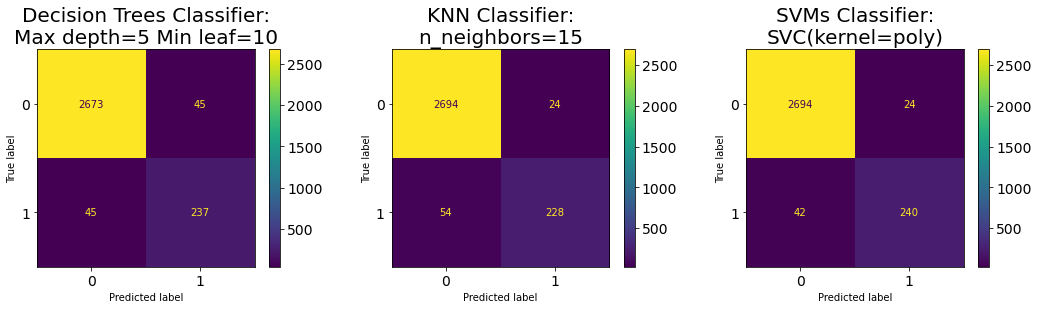

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ConfusionMatrixDisplay.from_estimator(dtc, X_test[numeric_columns], y_test, ax=ax[0])\
    .ax_.set_title("Decision Trees Classifier:\nMax depth=5 Min leaf=10")
ConfusionMatrixDisplay.from_estimator(knn, X_test[numeric_columns], y_test, ax=ax[1])\
    .ax_.set_title("KNN Classifier:\nn_neighbors=15") 
ConfusionMatrixDisplay.from_estimator(svm, X_test[numeric_columns], y_test, ax=ax[2])\
    .ax_.set_title("SVMs Classifier:\nSVC(kernel=poly)")
plt.show()

We generated the confusion matrices for each of the classifiers and check the performance on unseen data. We can see that **SVMs Classifier** have the highest "True Positives" number which is 240. As shown above, the `SVMs Classifier` with kernel=poly obtained the best result based on F1 score (0.879121).

We also perform cross-validation for this evaluation.

In [58]:
for clf in [dtc,knn,svm]:
    ts = cross_val_score(clf, X_test[numeric_columns], y_test, cv=cv_strat, n_jobs=-1, scoring="f1")
    print(f"--------------------------\n{clf}\nAverage F1: {ts.mean():.3f} +/- {ts.std():.3f}")

--------------------------
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)
Average F1: 0.812 +/- 0.048
--------------------------
KNeighborsClassifier(n_neighbors=15)
Average F1: 0.829 +/- 0.037
--------------------------
SVC(degree=2, kernel='poly', random_state=1)
Average F1: 0.835 +/- 0.019


<br/>**Insight**

From the results above we can see that SVM with poly kernel still the best classifier followed by KNN and decision tree. What surprised me most was that KNN got the highest score when it chose 15 neighbors. As K increases, the KNN fits a smoother curve to the data because when more data is considered, the complexity and flexibility of the model will reduce. And the different kernel of SVM has different performance, especially for the sigmoid one, which has the lowest score in almost all cases. Maybe because the SVM with a sigmoid kernel is equivalent to a 2-layer perceptron. However, the polynomial kernel has excellent performance and is always in the 1st place in this comparison. 

## Task 5: 
**Based on a filter technique, identify the three most discriminative features and the three least discriminative features in this dataset. Run the SVM classifiers with the four kernels on the top three and the bottom three features. How do the results compare? [10 marks]**

Mutual information measures the amount of dependency between two random variables and is based on entropy - a value of 0 indicates variables are completely independent.

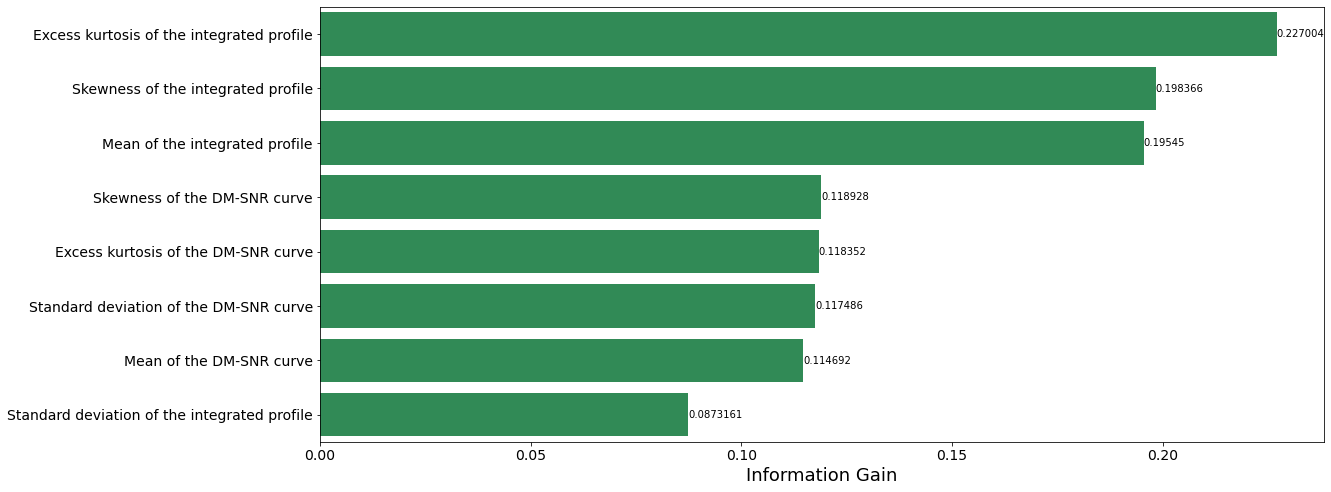

In [59]:
i_scores = mutual_info_classif(X_train[numeric_columns], y_train, random_state=1)

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores, index = X_train[numeric_columns].columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'], ascending=False, inplace=True)

plt.figure(figsize=(18, 8))
ax = sns.barplot(x="I-Gain", y=features_info_gain.index, data=features_info_gain, color="#229954")
ax.bar_label(ax.containers[0])
plt.xlabel("Information Gain", fontsize=18)
plt.show()

Generate top 3 and bottom 3 dataframes and produce the corresponding X (numpy) arrays

In [60]:
top3_features = features_info_gain.index[:3]
bottom3_features = features_info_gain.index[-3:]
print("Three most discriminative features are:")
for p in top3_features:
    print('\t',p)
print("\nThree least discriminative features are:")
for p in bottom3_features:
    print('\t',p)

Three most discriminative features are:
	 Excess kurtosis of the integrated profile
	 Skewness of the integrated profile
	 Mean of the integrated profile

Three least discriminative features are:
	 Standard deviation of the DM-SNR curve
	 Mean of the DM-SNR curve
	 Standard deviation of the integrated profile


**Use top & bottom 3 features**

In [61]:
print("================================================================\nTop 3 features")
SVM(X_train[top3_features], X_test[top3_features], y_train, y_test, detail=True);
print("\n================================================================\nBottom 3 features")
SVM(X_train[bottom3_features], X_test[bottom3_features], y_train, y_test, detail=True);

Top 3 features

SVC(kernel=rbf)
Prediction performance on testing set:  0.8571428571428571

SVC(kernel=linear)
Prediction performance on testing set:  0.8190854870775348

SVC(kernel=sigmoid)
Prediction performance on testing set:  0.6554307116104869

SVC(kernel=poly)
Prediction performance on testing set:  0.8634686346863468

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.863469.

Bottom 3 features

SVC(kernel=rbf)
Prediction performance on testing set:  0.6798245614035087

SVC(kernel=linear)
Prediction performance on testing set:  0.6475770925110134

SVC(kernel=sigmoid)
Prediction performance on testing set:  0.08863198458574183

SVC(kernel=poly)
Prediction performance on testing set:  0.6401766004415012

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=rbf) with F1 score = 0.679825.


<br/>**Insight**

We can see that the SVM using the most discriminative features has a higher F1 score `(0.863469)` than the SVM using the fewest features `(0.679825)`, even the lowest rated *sigmoid kernel* `(0.655431)` in top features still have better score than most of kernel use the bottom three features. The SVMs with poly kernel consistently achieved the highest results, but the sigmoid use bottom 3 features only have `0.088632` score, which was shocked me a lot.

## Task 6: 
**Carefully identify the most discriminating features to predict the binary outcome of the dataset using one wrapper feature selection technique. This should be done for each of the decision tree, kNN and four SVM classifiers from part Task 4. Report and discuss the differences between the feature subsets produced by the filter (Task 5) and the wrapper technique. [15 marks]**

### 1) Decision Tree Classifier


--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  5 
Min samples leaf = 10 
with F1 score = 0.840426.


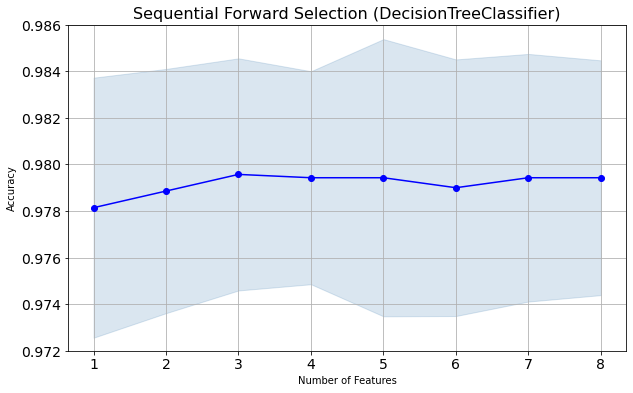

3 feature were selected.
Feature selected:  ('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Standard deviation of the DM-SNR curve')
With score:  0.9795714285714284


In [62]:
def wrapper(classifiers,X_train, y_train,y_lim):
    sfs_forward = SFS(classifiers, k_features="best", forward=True,\
                      floating=False, scoring='accuracy', cv=5)

    # try the sfs_forward model on the 
    sfs_forward = sfs_forward.fit(X_train, y_train)

    fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy',figsize=(10, 6))
    plt.ylim(y_lim)
    plt.title('Sequential Forward Selection (%s)'%classifiers.__class__.__name__,fontsize=16)
    plt.grid()
    plt.show()
    print("%d feature were selected." % len(sfs_forward.k_feature_names_))
    print("Feature selected: ",sfs_forward.k_feature_names_)
    print("With score: ",sfs_forward.k_score_)
    return sfs_forward.k_feature_names_
    
dtc = decision_trees(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
dtc_best_features = wrapper(dtc,X_train[numeric_columns], y_train,[0.972, 0.986])

### 2) *k* Nearest Neighbour Classifier


--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=15 with F1 score = 0.853933.


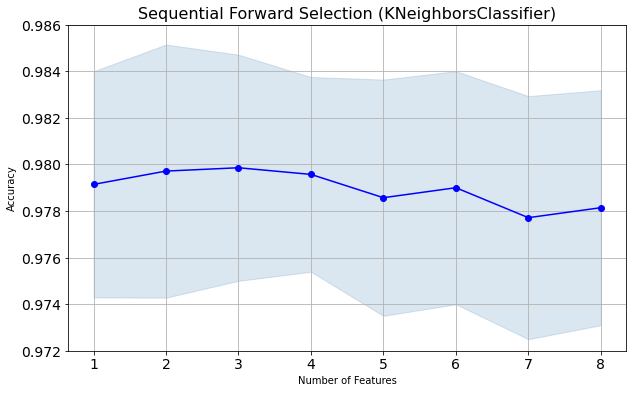

3 feature were selected.
Feature selected:  ('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile')
With score:  0.9798571428571428


In [63]:
knn = k_nn(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
knn_best_features = wrapper(knn,X_train[numeric_columns], y_train,[0.972, 0.986])

### 3) SVM classifiers 

(It may take 2 mins to run)


SVC(kernel=poly)


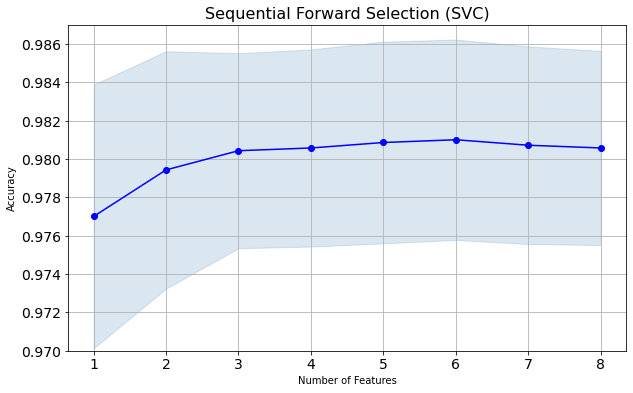

6 feature were selected.
Feature selected:  ('Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve')
With score:  0.9810000000000001

SVC(kernel=rbf)


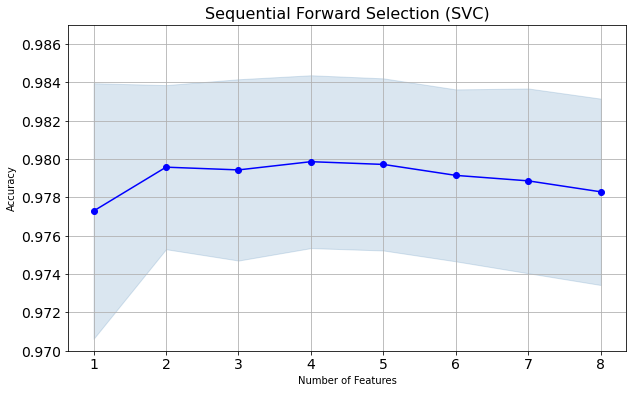

4 feature were selected.
Feature selected:  ('Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Excess kurtosis of the DM-SNR curve')
With score:  0.9798571428571428

SVC(kernel=linear)


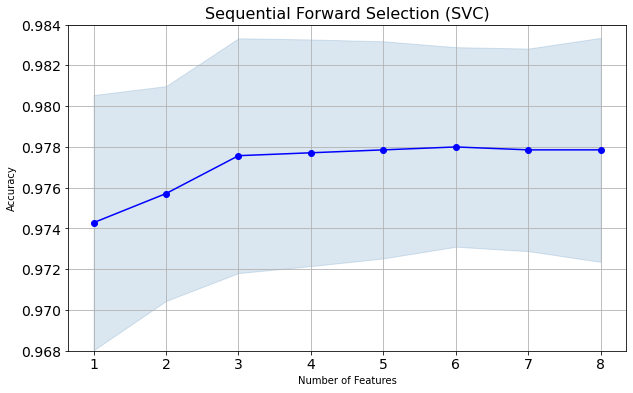

6 feature were selected.
Feature selected:  ('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve')
With score:  0.978

SVC(kernel=sigmoid)


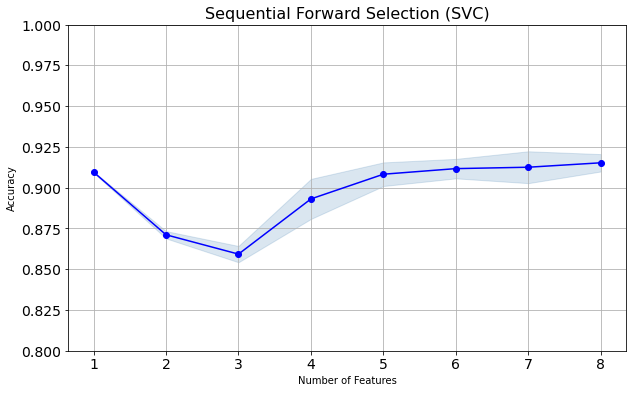

8 feature were selected.
Feature selected:  ('Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')
With score:  0.9152857142857143


In [64]:
svm_features = {}
for kernel,ylim in zip(["poly","rbf", "linear", "sigmoid"],[[0.97, 0.987],[0.97, 0.987],[0.968, 0.984],[0.8,1]]):
    print('\nSVC(kernel=%s)' % kernel)
    svm = SVC(kernel=kernel, degree=2, random_state=1)
    svm_features[kernel] = wrapper(svm,X_train[numeric_columns], y_train,ylim)

<br/>**Insight**

Both the decision tree and KNN classifiers scored highest with the selection of 3 features. Where **KNN** is **consistent with** the top 3 features generated using the **filter** method in Task-5. In SVM classifiers, **poly kernel** select with 6 feature still have the **highest score**. The interesting thing is, SVM(poly) choose the mean, standard deviation & excess kurtosis of the integrated profile and DM-SNR curve respectively. In addition, another difference with the filter method is that many of the bad 3 features considered in the Task-5 are selected in the wrapper.

## Task 7: 
**Compare the performance of different classifiers using the different feature subsets found in Tasks 5 and 6 and compare it to the results on original dataset that you reported in Task 4. Have the results improved or worsened after feature selection? Is the relative performance of different classifiers and configuration settings in line with your expectation? [10 marks]**

#### Top 3 features from ***Task 5***

In [65]:
def compare(feature, feature_name, X_train, X_test, y_train, y_test):
    print("\n===================%s Features Selected==================" % feature_name)
    print("\n-----------------SVM-----------------")
    svm = SVM(X_train[feature], X_test[feature], y_train, y_test, detail=False)
    print("\n------------Decision Trees-----------")
    dtc = decision_trees(X_train[feature], X_test[feature], y_train, y_test, detail=False)
    print("\n---------k Nearest Neighbour---------")
    knn = k_nn(X_train[feature], X_test[feature], y_train, y_test, detail=False)
    
compare(top3_features, "Top 3 (filter technique)", X_train, X_test, y_train, y_test)


===================Top 3 (filter technique) Features Selected==================

-----------------SVM-----------------

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.863469.

------------Decision Trees-----------

--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  2 
Min samples leaf = 1 
with F1 score = 0.835979.

---------k Nearest Neighbour---------

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=10 with F1 score = 0.860714.


#### Bset features from ***Task 6***

In [66]:
features = [dtc_best_features, knn_best_features, svm_features]
feature_names = ['Decision Tree Classifier','k Nearest Neighbour Classifier','SVM Classifier']
for f,f_name in zip(features,feature_names):
    if f_name == 'SVM Classifier':
        for name,fe in svm_features.items():
            #print(name,fe,'\n')
            compare(list(fe), name, X_train, X_test, y_train, y_test)
    else:
        compare(list(f), f_name, X_train, X_test, y_train, y_test)


===================Decision Tree Classifier Features Selected==================

-----------------SVM-----------------

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.876364.

------------Decision Trees-----------

--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  7 
Min samples leaf = 5 
with F1 score = 0.839858.

---------k Nearest Neighbour---------

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=15 with F1 score = 0.862963.

===================k Nearest Neighbour Classifier Features Selected==================

-----------------SVM-----------------

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.863469.

------------Decision Trees-----------

--------------------------------------------------------------


<br/>**Insight**

As we expected, the feature selection with filters is substantially faster than feature selection with wrappers. Especially, the wrapper using SVM takes the most time on average of all the classifiers. We have to reduce the degree from default (3) to 2 to speed up. Furthermore, the average scores of the Decision Tree and KNN classifiers are extremely similar. But overall KNN have better performance than decision tree. Not surprisingly, poly kernel-based SVM is still the best classifier whatever selected feature it use. 

| Classifers|   Best score with all features <br/> (Task 4)  | Best score with selected features <br/> (Task 5 & 6) | Improve? | Features Selected By | Technique
|:-:|:-:|:-:|:-:|:-:|:-:
|  Decision Trees | 0.840426 | 0.842478 | Yes | SVM(poly) Features Selected | Wrapper
|  k Nearest Neighbour | 0.853933 | 0.862963 | Yes | Decision Tree Classifier Features Selected | Wrapper
|  SVM(kernel=poly) | 0.879121 | 0.879121 | No (equal) | SVM(sigmoid) Features Selected | Wrapper

In general, feature selection technique is useful to improve the classifier's score, the wrapper is better than the filter, even though SVM cannot go higher and it may affect the score for it. That's the reason why it's important to pick a good selection of features.

## Task 8: 
**Plot the ROC curves for the "1" class and the different classification models. What do you learn from this ROC curve? Which classifier/configuration is best suited for this task? Are you satisfied with the performance? [15 marks]**


--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  5 
Min samples leaf = 10 
with F1 score = 0.840426.

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=15 with F1 score = 0.853933.

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.879121.


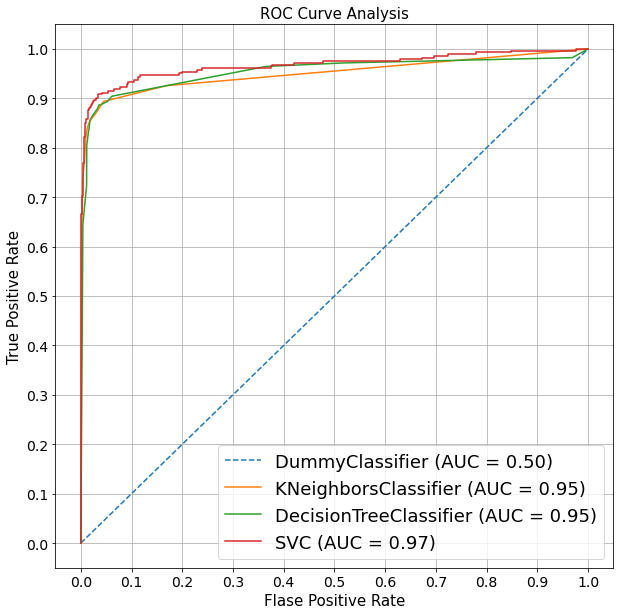

In [67]:
dtc = decision_trees(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
knn = k_nn(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
svm = SVM(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train[numeric_columns], y_train)

disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[numeric_columns], y_test, pos_label=1, linestyle="--")
for classifier in [knn, dtc, svm]:
    disp = RocCurveDisplay.from_estimator(classifier, X_test[numeric_columns], y_test, pos_label=1, ax=disp.ax_)

disp.ax_.grid()
disp.figure_.set_size_inches(10, 10)
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

<br/>**Insight**

According to the ROC curves above, the `SVMs Classifier` utilising the **poly kernel** has the maximum area under the curve (AUC), signifying the greatest ability to differentiate the target classes. The performance of SVM is adequate, as a score of **97%** is close to the perfect score of 100%. KNN and DT also reached to 95%. It outperforms the dummy classifier, which always predicts the majority class. 

Therefore, the **SVM(kernel=poly)** is the best classifier for this task.

## Task 9: 
**BONUS Question** 
**This part is open-ended -- Take the exploration and the discussion deeper than what is asked in the above questions and gain further insights.[10 marks]**

1. **Correlation of the various features with the target class**

In [68]:
data = X_train.copy()
data.target_class = data.target_class.astype(int)

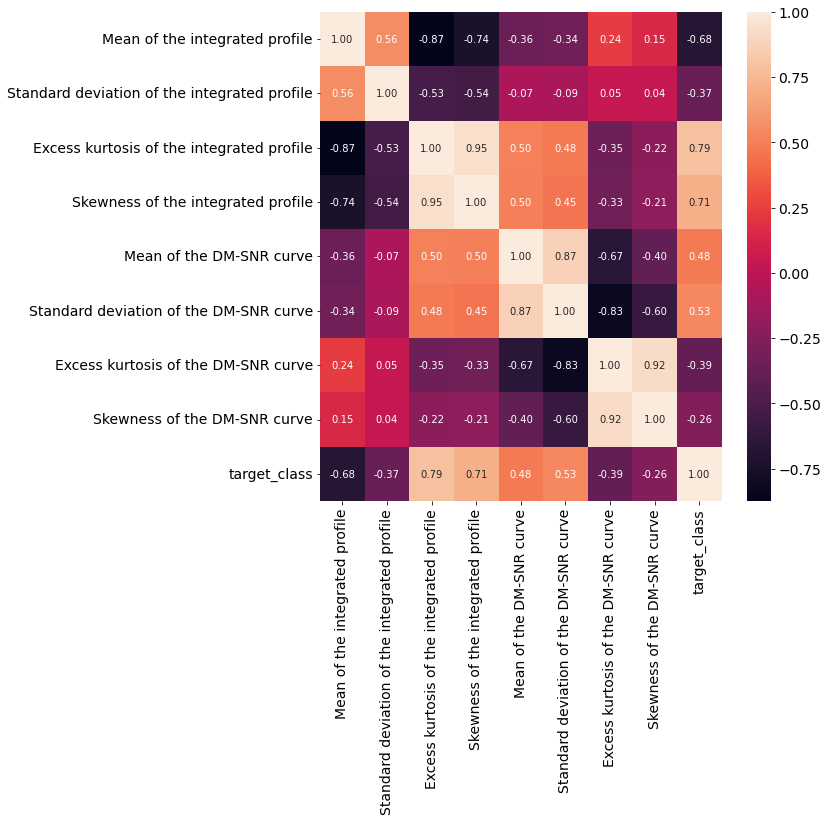

In [69]:
plt.figure(figsize=(9, 9))
sns.heatmap(data=data.corr(), annot=True, fmt = ".2f")
plt.show()

From the correlation of all features we can see that `Excess kurtosis of the integrated profile` have the highest corelation with `target class` (0.79). Followed by `Skewness of the integrated profile` (0.71). However, for `mean of integrated profile` have fewest correlation which is -0.68. Therefore, if the signal has a lower mean and standard deviation but higher excess kurtosis and skewness of integrated profile, should be one type. The DM-SNR curve related features are the opposite way.

2. **Feature selection and feature importance**
    
    - **Benefits of performing feature selection**

        - Reduce Overfitting
        
        - Improves Model Performance
        
        - Reduce Training Time

    - **Feature Selection Methods**
    
        - Filter feature selection
        
        - Wrapper method

    - **Feature Importance Methods**
    
        - **Coefficients as Feature Importance**
            - Linear Regression Feature Importance
            
            - Logistic Regression Feature Importance
            
         - **Decision Tree Feature Importance**
            - CART Regression Feature Importance
            
            - CART Classification Feature Importance

Model:  LinearRegression
Feature: 0, Score: 0.55175
Feature: 1, Score: -0.09389
Feature: 2, Score: 3.93698
Feature: 3, Score: -1.83629
Feature: 4, Score: -0.24297
Feature: 5, Score: 0.41744
Feature: 6, Score: -0.02233
Feature: 7, Score: 0.20714


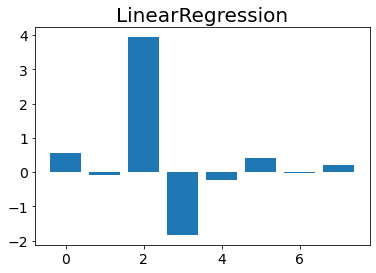

Model:  LogisticRegression
Feature: 0, Score: -7.29613
Feature: 1, Score: -0.74722
Feature: 2, Score: 8.39357
Feature: 3, Score: 3.33987
Feature: 4, Score: -2.73341
Feature: 5, Score: 5.13070
Feature: 6, Score: -0.75477
Feature: 7, Score: -0.39334


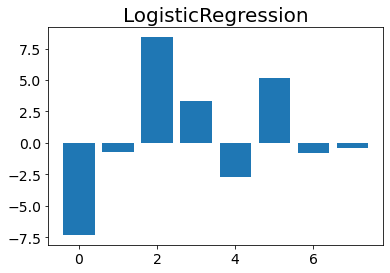

Model:  DecisionTreeRegressor
Feature: 0, Score: 0.03483
Feature: 1, Score: 0.03485
Feature: 2, Score: 0.81468
Feature: 3, Score: 0.01968
Feature: 4, Score: 0.02404
Feature: 5, Score: 0.02218
Feature: 6, Score: 0.03154
Feature: 7, Score: 0.01820


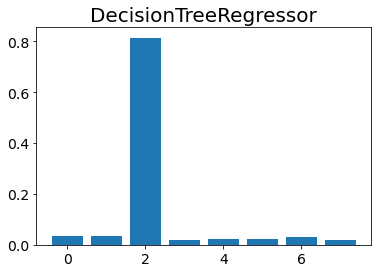

Model:  DecisionTreeClassifier
Feature: 0, Score: 0.03642
Feature: 1, Score: 0.03597
Feature: 2, Score: 0.81621
Feature: 3, Score: 0.02240
Feature: 4, Score: 0.02573
Feature: 5, Score: 0.01834
Feature: 6, Score: 0.02589
Feature: 7, Score: 0.01904


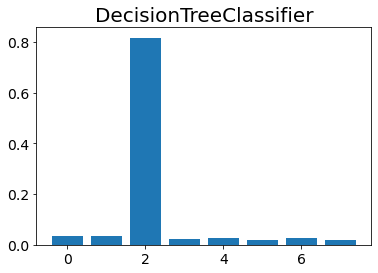

In [70]:
models = [LinearRegression(),LogisticRegression(),DecisionTreeRegressor(),DecisionTreeClassifier()]

for model in models:
    model_name = model.__class__.__name__
    print("Model: ",model_name)
    # fit the model
    model.fit(X_train[numeric_columns], y_train)
    # get importance
    if model_name == 'LinearRegression':
        importance = model.coef_
    elif model_name == 'LogisticRegression':
        importance = model.coef_[0]
    else:
        importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.title(model_name)
    plt.show()

From the cart above we find that column `Excess kurtosis of the integrated profile` have the highest feature importance score, which means it is the **critical** column in our dataset.

3. **Relative performance of different classifiers (different kernels in case of SVM) and different parameter settings w.r.t different evaluation measures.**

if we use **balanced_accuracy** as our evaluation measures.


--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  None 
Min samples leaf = 5 
with Balanced accuracy = 0.918040.

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=5 with Balanced accuracy = 0.900326.

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with Balanced accuracy = 0.921117.


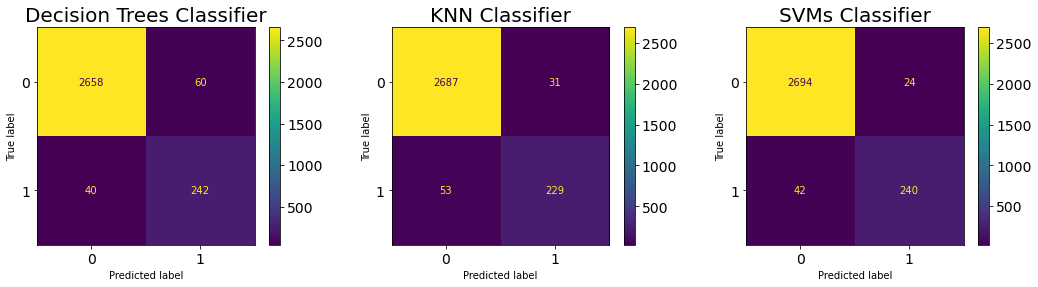

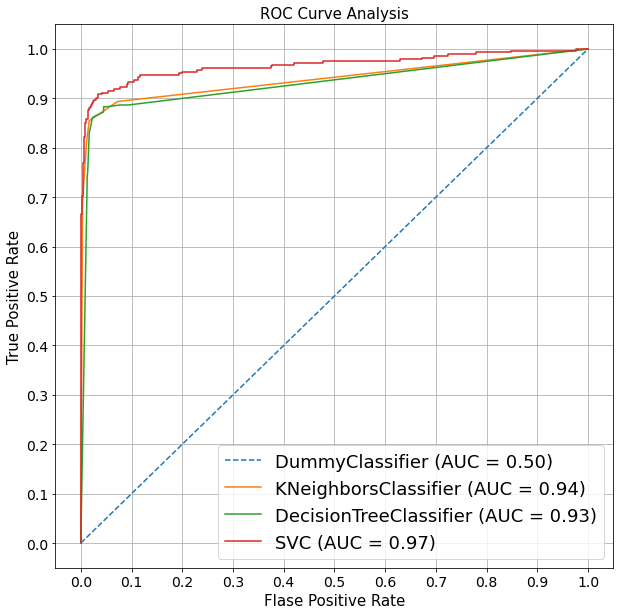

In [71]:
# Find 3 best clf
dtc = decision_trees(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False, measure='balance')
knn = k_nn(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False, measure='balance')
svm = SVM(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False, measure='balance')

# Show on the confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ConfusionMatrixDisplay.from_estimator(dtc, X_test[numeric_columns], y_test, ax=ax[0])\
    .ax_.set_title("Decision Trees Classifier")
ConfusionMatrixDisplay.from_estimator(knn, X_test[numeric_columns], y_test, ax=ax[1])\
    .ax_.set_title("KNN Classifier") 
ConfusionMatrixDisplay.from_estimator(svm, X_test[numeric_columns], y_test, ax=ax[2])\
    .ax_.set_title("SVMs Classifier")
plt.show()

# Show ROC Curve
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train[numeric_columns], y_train)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[numeric_columns], y_test, pos_label=1, linestyle="--")
for classifier in [knn, dtc, svm]:
    disp = RocCurveDisplay.from_estimator(classifier, X_test[numeric_columns], y_test, pos_label=1, ax=disp.ax_)
disp.ax_.grid()
disp.figure_.set_size_inches(10, 10)
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

The accuracy of model decrease after we change measure method from f1 to balanced accuracy, and the maximum area under the curve(AUC) also droped 1-2%, but our SVM still have 97%.

4. **Effect of different ways of imputing missing values on the final performance of different classifiers.**

    We used the **K-nearest neighbors** method earlier to fill in the missing values, let's try other method like **mean**, **median** of that column.
    
    - **Mean**

No missing value in both training and test sets

--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  5 
Min samples leaf = 2 
with F1 score = 0.859206.

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=10 with F1 score = 0.853333.

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.866290.


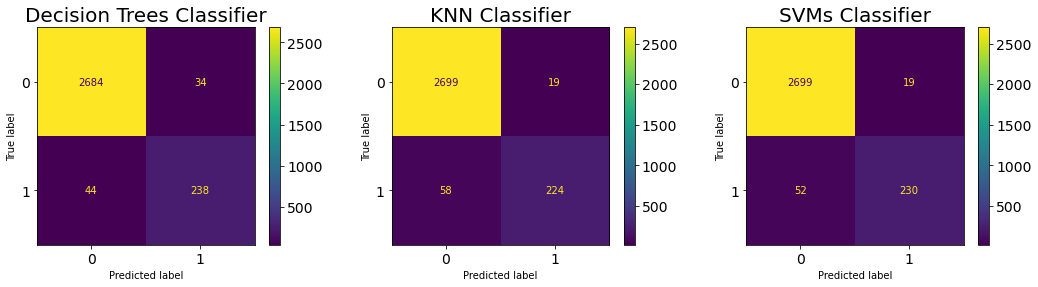

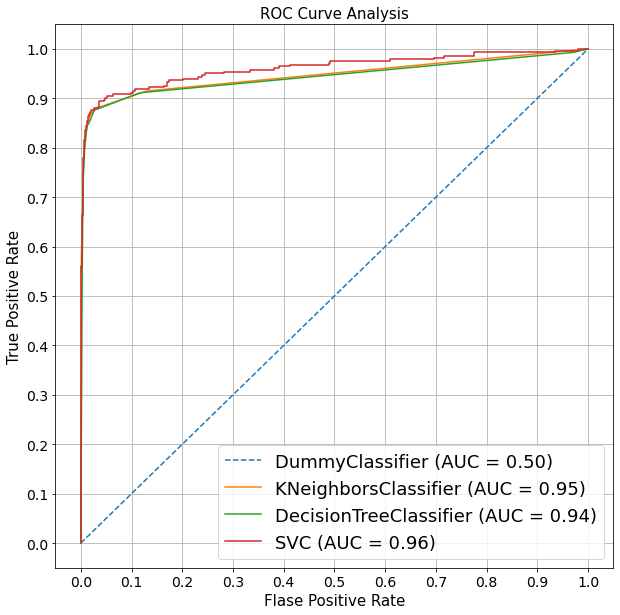

In [72]:
X_train = X_train_copy.copy()
X_test = X_test_copy.copy()

miss_cols = ['Excess kurtosis of the integrated profile',\
             'Standard deviation of the DM-SNR curve',\
             'Skewness of the DM-SNR curve']

# Fill mean to nan value in training set
for col in miss_cols:
    X_train[col].fillna((X_train[col].mean()), inplace=True)
    # Use mean from train set to avoid data leakage
    X_test[col].fillna((X_train[col].mean()), inplace=True)
    
    
def run(X_train,X_test):
    # Check missing value again
    if X_train.isna().sum().sum() == X_test.isna().sum().sum() == 0:
        print("No missing value in both training and test sets")

    # Normalization
    label = LabelEncoder()
    X_train['target_class'] = X_train[['target_class']].apply(label.fit_transform)
    X_train['target_class'] = X_train['target_class'].astype('category')
    X_test['target_class'] = X_test[['target_class']].apply(label.fit_transform)
    X_test['target_class'] = X_test['target_class'].astype('category')
    
    scaler =  MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns].values),columns=numeric_columns)
    X_train = pd.concat([X_train_scaled, X_train.target_class.reset_index()], axis=1).set_index('index')
    X_train.index.name = None
    scaler =  MinMaxScaler(feature_range=(0, 1))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_columns].values),columns=numeric_columns)
    X_test = pd.concat([X_test_scaled, X_test.target_class.reset_index()], axis=1).set_index('index')
    X_test.index.name = None

    y_train = X_train.target_class
    y_test = X_test.target_class
    
    # Find 3 best clf
    dtc = decision_trees(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
    knn = k_nn(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)
    svm = SVM(X_train[numeric_columns], X_test[numeric_columns], y_train, y_test, detail=False)

    # Show on the confusion matrix
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    ConfusionMatrixDisplay.from_estimator(dtc, X_test[numeric_columns], y_test, ax=ax[0])\
        .ax_.set_title("Decision Trees Classifier")
    ConfusionMatrixDisplay.from_estimator(knn, X_test[numeric_columns], y_test, ax=ax[1])\
        .ax_.set_title("KNN Classifier") 
    ConfusionMatrixDisplay.from_estimator(svm, X_test[numeric_columns], y_test, ax=ax[2])\
        .ax_.set_title("SVMs Classifier")
    plt.show()

    # Show ROC Curve
    dummy_classifier = DummyClassifier(strategy="most_frequent")
    dummy_classifier.fit(X_train[numeric_columns], y_train)
    disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[numeric_columns], y_test, pos_label=1, linestyle="--")
    for classifier in [knn, dtc, svm]:
        disp = RocCurveDisplay.from_estimator(classifier, X_test[numeric_columns], y_test, pos_label=1, ax=disp.ax_)
    disp.ax_.grid()
    disp.figure_.set_size_inches(10, 10)
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Analysis', fontsize=15)
    plt.legend(prop={'size':18}, loc='lower right')
    plt.show()

run(X_train,X_test)

- **Median**

No missing value in both training and test sets

--------------------------------------------------------------
The Best Decision Trees Classifier is: 
Max depth =  7 
Min samples leaf = 2 
with F1 score = 0.850909.

--------------------------------------------------------------
The Best KNN Classifier is: n_neighbors=5 with F1 score = 0.850187.

--------------------------------------------------------------
The Best SVMs Classifier is: SVC(kernel=poly) with F1 score = 0.864151.


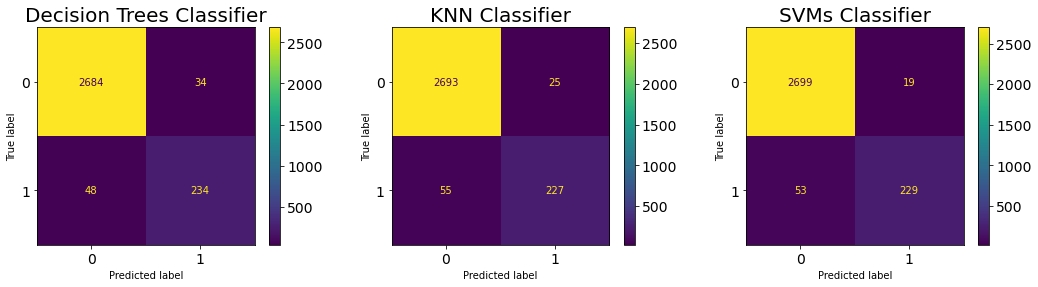

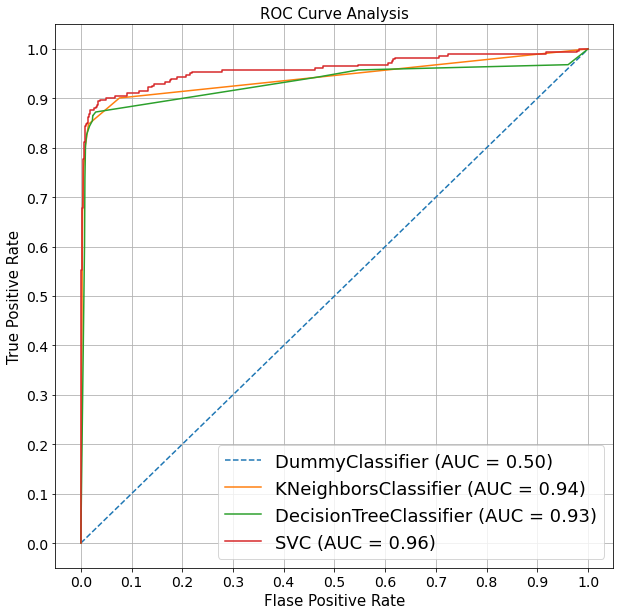

In [73]:
X_train = X_train_copy.copy()
X_test = X_test_copy.copy()

# Fill median to nan value in training set
for col in miss_cols:
    X_train[col].fillna((X_train[col].median()), inplace=True)
    # Use mean from train set to avoid data leakage
    X_test[col].fillna((X_train[col].median()), inplace=True)
    
run(X_train,X_test)

We found that the different methods of filling in the missing values affect the performance of the classifier. In most classifiers, **mean is better than median**, but not as accurate as KNN to predict missing values.